# Model Training
### Load processed data, train models, and evaluate models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/processed/RTX_merged_substituted_labeled_df.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Next Adj Close,Price Change Label,Volume,Ticker Symbol,Publish Date,Title,Body Text,URL,Negative Score,Neutral Score,Positive Score,Compound Score
0,2017-06-23,76.784142,77.054749,76.456894,76.916298,65.686562,65.498444,0,6119398,RTX,2017-06-23,Layoffs planned at Carrier By Seeking Alpha,Please try another search,https://www.investing.com/news/stock-market-ne...,0.0,0.566,0.434,0.3182
1,2017-06-26,77.035873,77.463814,76.658279,76.696037,65.498444,65.347954,0,2613111,RTX,NaN,NaN,NaN,NaN,0.0,0.000,0.000,0.0000
2,2017-06-27,76.727501,76.865952,76.469475,76.519821,65.347954,65.837029,1,2706226,RTX,NaN,NaN,NaN,NaN,0.0,0.000,0.000,0.0000
3,2017-06-28,76.821899,77.155441,76.582756,77.092514,65.837029,65.380203,0,2862107,RTX,NaN,NaN,NaN,NaN,0.0,0.000,0.000,0.0000
4,2017-06-29,77.042168,77.067337,75.909378,76.557587,65.380203,65.627426,1,3747815,RTX,NaN,NaN,NaN,NaN,0.0,0.000,0.000,0.0000


In [2]:
# Create the feature data set
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Compound Score']
X = df[features]
# Create target data set
y = np.array(df['Next Adj Close'])

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# For the first use, uncomment below and run this cell
#!pip install keras
#!pip install tensorflow
#!pip install keras-tuner


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/24/63/bbc83d949e1940d079dcd1cd87e31498bfb71d641c8e33d917ca3f2e51a9/keras-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/25/5e/2e29933bd1dd67c76b56dd37f5950e6a0cf86ce67e9a9eb6761dac80c031/h5py-3.10.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     -------------------------------------- 101.3/101.3 kB 2.8 MB/s eta 0:00:00
  Obtaining dependency information for markdown-it-py>=2

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   ------------ -------------------------- 41.0/128.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [4]:
# Data = {X_train:, y_train:, y_test:, X_test:}

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


def model_train_eval(model, data, parameters):    
    model_temp=GridSearchCV(model, parameters).fit(data["X_train"], data["y_train"])
    # model_temp=model.fit(data["X_train"], data["y_train"])
    y_pred=model_temp.predict(data["X_test"])
    mse=mean_squared_error(data["y_test"], y_pred)
    print("Mean Squared Error: ", mse)
    total=0
    for i, e in enumerate(y_pred):
        total+=abs((data["y_test"][i]-e)/data["y_test"][i])
    print(f"Mean Absolute Percentage Error: {total/len(y_pred)}")

In [5]:
from sklearn.linear_model import LinearRegression
data={"X_test":X_test, "X_train":X_train, "y_test":y_test, "y_train":y_train}
# The data here needs to be imported from the other data collection notebook
model_train_eval(LinearRegression(), data, {})

Mean Squared Error:  1.390351761347966
Mean Absolute Percentage Error: 0.011346555488637148


In [6]:
from sklearn.neural_network import MLPRegressor
model_train_eval(MLPRegressor(), data, {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
    'activation': ['relu','tanh','logistic'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
})

C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anacond

C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anacond

C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anacond

C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Seungju\anacond

Mean Squared Error:  381.46003874671067
Mean Absolute Percentage Error: 0.19995287222057023


C:\Users\Seungju\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
from keras.models import Sequential
import keras_tuner
from keras.layers import LSTM, Dropout, Dense
hp=keras_tuner.HyperParameters()
model=Sequential()
model.add(LSTM(units=hp.Int("units", min_value=32, max_value=512, step=32),return_sequences=True, input_shape=(X_train.shape[1],1), activation=hp.Choice("activation", ["relu", "tanh"])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error', "mean_absolute_percentage_error"])
model.fit(X_train, y_train, epochs=7500, batch_size=32)





Epoch 1/7500


41/41 [==============================] - 5s 7ms/step - loss: 5221.0015 - mean_squared_error: 5221.0015 - mean_absolute_error: 71.0795 - mean_absolute_percentage_error: 93.0137
Epoch 2/7500
41/41 [==============================] - 0s 7ms/step - loss: 4281.6133 - mean_squared_error: 4281.6133 - mean_absolute_error: 64.2416 - mean_absolute_percentage_error: 83.8222
Epoch 3/7500
41/41 [==============================] - 0s 7ms/step - loss: 3964.7549 - mean_squared_error: 3964.7549 - mean_absolute_error: 61.7168 - mean_absolute_percentage_error: 80.4105
Epoch 4/7500
41/41 [==============================] - 0s 7ms/step - loss: 3697.5376 - mean_squared_error: 3697.5376 - mean_absolute_error: 59.5169 - mean_absolute_percentage_error: 77.4508
Epoch 5/7500
41/41 [==============================] - 0s 8ms/step - loss: 3429.3494 - mean_squared_error: 3429.3494 - mean_absolute_error: 57.2211 - mean_absolute_percentage_error: 74.3612
Epoch 6/7500
41/41 [==============================

41/41 [==============================] - 0s 7ms/step - loss: 307.4201 - mean_squared_error: 307.4201 - mean_absolute_error: 14.2384 - mean_absolute_percentage_error: 17.5012
Epoch 39/7500
41/41 [==============================] - 0s 7ms/step - loss: 283.4685 - mean_squared_error: 283.4685 - mean_absolute_error: 13.5968 - mean_absolute_percentage_error: 16.7748
Epoch 40/7500
41/41 [==============================] - 0s 7ms/step - loss: 276.4105 - mean_squared_error: 276.4105 - mean_absolute_error: 13.4003 - mean_absolute_percentage_error: 16.5735
Epoch 41/7500
41/41 [==============================] - 0s 7ms/step - loss: 259.7952 - mean_squared_error: 259.7952 - mean_absolute_error: 12.9592 - mean_absolute_percentage_error: 16.0588
Epoch 42/7500
41/41 [==============================] - 0s 7ms/step - loss: 251.5805 - mean_squared_error: 251.5805 - mean_absolute_error: 12.7752 - mean_absolute_percentage_error: 15.9892
Epoch 43/7500
41/41 [==============================] - 0s 7ms/step - loss:

41/41 [==============================] - 0s 7ms/step - loss: 185.3523 - mean_squared_error: 185.3523 - mean_absolute_error: 11.1229 - mean_absolute_percentage_error: 15.1394
Epoch 82/7500
41/41 [==============================] - 0s 7ms/step - loss: 190.8820 - mean_squared_error: 190.8820 - mean_absolute_error: 11.3215 - mean_absolute_percentage_error: 15.3492
Epoch 83/7500
41/41 [==============================] - 0s 7ms/step - loss: 189.2124 - mean_squared_error: 189.2124 - mean_absolute_error: 11.3458 - mean_absolute_percentage_error: 15.3788
Epoch 84/7500
41/41 [==============================] - 0s 7ms/step - loss: 185.8499 - mean_squared_error: 185.8499 - mean_absolute_error: 11.3017 - mean_absolute_percentage_error: 15.3146
Epoch 85/7500
41/41 [==============================] - 0s 7ms/step - loss: 182.3215 - mean_squared_error: 182.3215 - mean_absolute_error: 11.1586 - mean_absolute_percentage_error: 15.1706
Epoch 86/7500
41/41 [==============================] - 0s 7ms/step - loss:

41/41 [==============================] - 0s 8ms/step - loss: 98.0476 - mean_squared_error: 98.0476 - mean_absolute_error: 7.8495 - mean_absolute_percentage_error: 10.0833
Epoch 125/7500
41/41 [==============================] - 0s 8ms/step - loss: 97.9640 - mean_squared_error: 97.9640 - mean_absolute_error: 7.9037 - mean_absolute_percentage_error: 10.3049
Epoch 126/7500
41/41 [==============================] - 0s 9ms/step - loss: 83.7204 - mean_squared_error: 83.7204 - mean_absolute_error: 7.1686 - mean_absolute_percentage_error: 9.3073
Epoch 127/7500
41/41 [==============================] - 0s 9ms/step - loss: 73.0220 - mean_squared_error: 73.0220 - mean_absolute_error: 6.7587 - mean_absolute_percentage_error: 8.7289
Epoch 128/7500
41/41 [==============================] - 0s 8ms/step - loss: 67.7497 - mean_squared_error: 67.7497 - mean_absolute_error: 6.5384 - mean_absolute_percentage_error: 8.4839
Epoch 129/7500
41/41 [==============================] - 0s 8ms/step - loss: 75.3488 - me

41/41 [==============================] - 0s 7ms/step - loss: 49.6555 - mean_squared_error: 49.6555 - mean_absolute_error: 5.6060 - mean_absolute_percentage_error: 7.4347
Epoch 169/7500
41/41 [==============================] - 0s 7ms/step - loss: 46.8254 - mean_squared_error: 46.8254 - mean_absolute_error: 5.3885 - mean_absolute_percentage_error: 7.1239
Epoch 170/7500
41/41 [==============================] - 0s 7ms/step - loss: 48.4109 - mean_squared_error: 48.4109 - mean_absolute_error: 5.5320 - mean_absolute_percentage_error: 7.3037
Epoch 171/7500
41/41 [==============================] - 0s 7ms/step - loss: 48.1028 - mean_squared_error: 48.1028 - mean_absolute_error: 5.4797 - mean_absolute_percentage_error: 7.2514
Epoch 172/7500
41/41 [==============================] - 0s 8ms/step - loss: 50.2987 - mean_squared_error: 50.2987 - mean_absolute_error: 5.6019 - mean_absolute_percentage_error: 7.3941
Epoch 173/7500
41/41 [==============================] - 0s 7ms/step - loss: 43.0990 - mean

41/41 [==============================] - 0s 7ms/step - loss: 45.1702 - mean_squared_error: 45.1702 - mean_absolute_error: 5.2875 - mean_absolute_percentage_error: 6.9894
Epoch 213/7500
41/41 [==============================] - 0s 7ms/step - loss: 45.1888 - mean_squared_error: 45.1888 - mean_absolute_error: 5.3180 - mean_absolute_percentage_error: 6.9966
Epoch 214/7500
41/41 [==============================] - 0s 7ms/step - loss: 46.4435 - mean_squared_error: 46.4435 - mean_absolute_error: 5.4434 - mean_absolute_percentage_error: 7.2151
Epoch 215/7500
41/41 [==============================] - 0s 7ms/step - loss: 48.1836 - mean_squared_error: 48.1836 - mean_absolute_error: 5.5570 - mean_absolute_percentage_error: 7.3869
Epoch 216/7500
41/41 [==============================] - 0s 7ms/step - loss: 46.9850 - mean_squared_error: 46.9850 - mean_absolute_error: 5.4958 - mean_absolute_percentage_error: 7.2773
Epoch 217/7500
41/41 [==============================] - 0s 7ms/step - loss: 45.6229 - mean

41/41 [==============================] - 0s 7ms/step - loss: 44.6324 - mean_squared_error: 44.6324 - mean_absolute_error: 5.2580 - mean_absolute_percentage_error: 6.9499
Epoch 257/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.5827 - mean_squared_error: 40.5827 - mean_absolute_error: 5.0704 - mean_absolute_percentage_error: 6.6777
Epoch 258/7500
41/41 [==============================] - 0s 7ms/step - loss: 43.9387 - mean_squared_error: 43.9387 - mean_absolute_error: 5.2558 - mean_absolute_percentage_error: 6.9510
Epoch 259/7500
41/41 [==============================] - 0s 8ms/step - loss: 40.7932 - mean_squared_error: 40.7932 - mean_absolute_error: 5.0579 - mean_absolute_percentage_error: 6.6750
Epoch 260/7500
41/41 [==============================] - 0s 7ms/step - loss: 43.3535 - mean_squared_error: 43.3535 - mean_absolute_error: 5.2419 - mean_absolute_percentage_error: 6.9599
Epoch 261/7500
41/41 [==============================] - 0s 7ms/step - loss: 42.0158 - mean

41/41 [==============================] - 0s 7ms/step - loss: 46.9498 - mean_squared_error: 46.9498 - mean_absolute_error: 5.4014 - mean_absolute_percentage_error: 7.1037
Epoch 301/7500
41/41 [==============================] - 0s 7ms/step - loss: 38.6476 - mean_squared_error: 38.6476 - mean_absolute_error: 4.9626 - mean_absolute_percentage_error: 6.5687
Epoch 302/7500
41/41 [==============================] - 0s 7ms/step - loss: 42.7112 - mean_squared_error: 42.7112 - mean_absolute_error: 5.1393 - mean_absolute_percentage_error: 6.7552
Epoch 303/7500
41/41 [==============================] - 0s 7ms/step - loss: 42.8853 - mean_squared_error: 42.8853 - mean_absolute_error: 5.1104 - mean_absolute_percentage_error: 6.7481
Epoch 304/7500
41/41 [==============================] - 0s 7ms/step - loss: 45.8810 - mean_squared_error: 45.8810 - mean_absolute_error: 5.3793 - mean_absolute_percentage_error: 7.1234
Epoch 305/7500
41/41 [==============================] - 0s 7ms/step - loss: 47.0485 - mean

41/41 [==============================] - 0s 8ms/step - loss: 37.6014 - mean_squared_error: 37.6014 - mean_absolute_error: 4.8889 - mean_absolute_percentage_error: 6.4533
Epoch 345/7500
41/41 [==============================] - 0s 9ms/step - loss: 41.3473 - mean_squared_error: 41.3473 - mean_absolute_error: 5.1210 - mean_absolute_percentage_error: 6.7463
Epoch 346/7500
41/41 [==============================] - 0s 7ms/step - loss: 41.9787 - mean_squared_error: 41.9787 - mean_absolute_error: 5.1555 - mean_absolute_percentage_error: 6.8032
Epoch 347/7500
41/41 [==============================] - 0s 7ms/step - loss: 39.0701 - mean_squared_error: 39.0701 - mean_absolute_error: 5.0043 - mean_absolute_percentage_error: 6.6331
Epoch 348/7500
41/41 [==============================] - 0s 7ms/step - loss: 41.4438 - mean_squared_error: 41.4438 - mean_absolute_error: 5.0476 - mean_absolute_percentage_error: 6.7060
Epoch 349/7500
41/41 [==============================] - 0s 7ms/step - loss: 42.6171 - mean

41/41 [==============================] - 0s 7ms/step - loss: 44.7765 - mean_squared_error: 44.7765 - mean_absolute_error: 5.3414 - mean_absolute_percentage_error: 7.0765
Epoch 389/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.1528 - mean_squared_error: 40.1528 - mean_absolute_error: 5.0205 - mean_absolute_percentage_error: 6.6330
Epoch 390/7500
41/41 [==============================] - 0s 8ms/step - loss: 47.6185 - mean_squared_error: 47.6185 - mean_absolute_error: 5.4631 - mean_absolute_percentage_error: 7.1913
Epoch 391/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.8858 - mean_squared_error: 40.8858 - mean_absolute_error: 5.0609 - mean_absolute_percentage_error: 6.6840
Epoch 392/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.3565 - mean_squared_error: 40.3565 - mean_absolute_error: 4.9943 - mean_absolute_percentage_error: 6.5822
Epoch 393/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.9417 - mean

41/41 [==============================] - 0s 7ms/step - loss: 42.9051 - mean_squared_error: 42.9051 - mean_absolute_error: 5.1234 - mean_absolute_percentage_error: 6.7597
Epoch 433/7500
41/41 [==============================] - 0s 6ms/step - loss: 37.1038 - mean_squared_error: 37.1038 - mean_absolute_error: 4.8346 - mean_absolute_percentage_error: 6.4018
Epoch 434/7500
41/41 [==============================] - 0s 7ms/step - loss: 43.2130 - mean_squared_error: 43.2130 - mean_absolute_error: 5.2256 - mean_absolute_percentage_error: 6.8940
Epoch 435/7500
41/41 [==============================] - 0s 7ms/step - loss: 42.3074 - mean_squared_error: 42.3074 - mean_absolute_error: 5.1630 - mean_absolute_percentage_error: 6.8548
Epoch 436/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.0513 - mean_squared_error: 40.0513 - mean_absolute_error: 4.8960 - mean_absolute_percentage_error: 6.4644
Epoch 437/7500
41/41 [==============================] - 0s 7ms/step - loss: 41.1607 - mean

41/41 [==============================] - 0s 7ms/step - loss: 38.7673 - mean_squared_error: 38.7673 - mean_absolute_error: 4.9329 - mean_absolute_percentage_error: 6.5178
Epoch 477/7500
41/41 [==============================] - 0s 7ms/step - loss: 40.0679 - mean_squared_error: 40.0679 - mean_absolute_error: 4.9946 - mean_absolute_percentage_error: 6.5847
Epoch 478/7500
41/41 [==============================] - 0s 7ms/step - loss: 41.0740 - mean_squared_error: 41.0740 - mean_absolute_error: 5.1355 - mean_absolute_percentage_error: 6.7757
Epoch 479/7500
41/41 [==============================] - 0s 7ms/step - loss: 37.4134 - mean_squared_error: 37.4134 - mean_absolute_error: 4.7882 - mean_absolute_percentage_error: 6.3098
Epoch 480/7500
41/41 [==============================] - 0s 8ms/step - loss: 38.7944 - mean_squared_error: 38.7944 - mean_absolute_error: 4.9650 - mean_absolute_percentage_error: 6.5548
Epoch 481/7500
41/41 [==============================] - 0s 7ms/step - loss: 39.0085 - mean

41/41 [==============================] - 0s 7ms/step - loss: 33.7338 - mean_squared_error: 33.7338 - mean_absolute_error: 4.6188 - mean_absolute_percentage_error: 6.1254
Epoch 521/7500
41/41 [==============================] - 0s 7ms/step - loss: 36.0529 - mean_squared_error: 36.0529 - mean_absolute_error: 4.6681 - mean_absolute_percentage_error: 6.1511
Epoch 522/7500
41/41 [==============================] - 0s 7ms/step - loss: 37.2178 - mean_squared_error: 37.2178 - mean_absolute_error: 4.8370 - mean_absolute_percentage_error: 6.3787
Epoch 523/7500
41/41 [==============================] - 0s 7ms/step - loss: 36.7521 - mean_squared_error: 36.7521 - mean_absolute_error: 4.7498 - mean_absolute_percentage_error: 6.1873
Epoch 524/7500
41/41 [==============================] - 0s 8ms/step - loss: 32.4847 - mean_squared_error: 32.4847 - mean_absolute_error: 4.4837 - mean_absolute_percentage_error: 5.9067
Epoch 525/7500
41/41 [==============================] - 0s 7ms/step - loss: 34.7464 - mean

41/41 [==============================] - 0s 7ms/step - loss: 35.9553 - mean_squared_error: 35.9553 - mean_absolute_error: 4.6845 - mean_absolute_percentage_error: 6.1598
Epoch 565/7500
41/41 [==============================] - 0s 7ms/step - loss: 33.0607 - mean_squared_error: 33.0607 - mean_absolute_error: 4.4841 - mean_absolute_percentage_error: 5.8898
Epoch 566/7500
41/41 [==============================] - 0s 7ms/step - loss: 35.5720 - mean_squared_error: 35.5720 - mean_absolute_error: 4.7320 - mean_absolute_percentage_error: 6.2127
Epoch 567/7500
41/41 [==============================] - 0s 7ms/step - loss: 32.4364 - mean_squared_error: 32.4364 - mean_absolute_error: 4.4733 - mean_absolute_percentage_error: 5.9020
Epoch 568/7500
41/41 [==============================] - 0s 7ms/step - loss: 35.6350 - mean_squared_error: 35.6350 - mean_absolute_error: 4.7331 - mean_absolute_percentage_error: 6.2032
Epoch 569/7500
41/41 [==============================] - 0s 8ms/step - loss: 33.9979 - mean

41/41 [==============================] - 0s 7ms/step - loss: 31.7878 - mean_squared_error: 31.7878 - mean_absolute_error: 4.4218 - mean_absolute_percentage_error: 5.8272
Epoch 609/7500
41/41 [==============================] - 0s 7ms/step - loss: 33.0844 - mean_squared_error: 33.0844 - mean_absolute_error: 4.5728 - mean_absolute_percentage_error: 6.0238
Epoch 610/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.6230 - mean_squared_error: 31.6230 - mean_absolute_error: 4.4842 - mean_absolute_percentage_error: 5.9023
Epoch 611/7500
41/41 [==============================] - 0s 7ms/step - loss: 33.8639 - mean_squared_error: 33.8639 - mean_absolute_error: 4.5700 - mean_absolute_percentage_error: 6.0138
Epoch 612/7500
41/41 [==============================] - 0s 7ms/step - loss: 35.3760 - mean_squared_error: 35.3760 - mean_absolute_error: 4.6411 - mean_absolute_percentage_error: 6.0995
Epoch 613/7500
41/41 [==============================] - 0s 8ms/step - loss: 36.9515 - mean

41/41 [==============================] - 0s 7ms/step - loss: 32.5291 - mean_squared_error: 32.5291 - mean_absolute_error: 4.4727 - mean_absolute_percentage_error: 5.8755
Epoch 653/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.5179 - mean_squared_error: 31.5179 - mean_absolute_error: 4.4370 - mean_absolute_percentage_error: 5.8332
Epoch 654/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.0673 - mean_squared_error: 30.0673 - mean_absolute_error: 4.2781 - mean_absolute_percentage_error: 5.6435
Epoch 655/7500
41/41 [==============================] - 0s 7ms/step - loss: 34.1468 - mean_squared_error: 34.1468 - mean_absolute_error: 4.6548 - mean_absolute_percentage_error: 6.1535
Epoch 656/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.4703 - mean_squared_error: 29.4703 - mean_absolute_error: 4.2742 - mean_absolute_percentage_error: 5.6423
Epoch 657/7500
41/41 [==============================] - 0s 7ms/step - loss: 33.6427 - mean

41/41 [==============================] - 0s 7ms/step - loss: 30.5198 - mean_squared_error: 30.5198 - mean_absolute_error: 4.4233 - mean_absolute_percentage_error: 5.8790
Epoch 697/7500
41/41 [==============================] - 0s 7ms/step - loss: 33.6517 - mean_squared_error: 33.6517 - mean_absolute_error: 4.5966 - mean_absolute_percentage_error: 6.0753
Epoch 698/7500
41/41 [==============================] - 0s 8ms/step - loss: 33.8989 - mean_squared_error: 33.8989 - mean_absolute_error: 4.6214 - mean_absolute_percentage_error: 6.0610
Epoch 699/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.4188 - mean_squared_error: 31.4188 - mean_absolute_error: 4.4495 - mean_absolute_percentage_error: 5.8733
Epoch 700/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.5615 - mean_squared_error: 30.5615 - mean_absolute_error: 4.3498 - mean_absolute_percentage_error: 5.7307
Epoch 701/7500
41/41 [==============================] - 0s 7ms/step - loss: 34.0386 - mean

41/41 [==============================] - 0s 7ms/step - loss: 31.2355 - mean_squared_error: 31.2355 - mean_absolute_error: 4.4186 - mean_absolute_percentage_error: 5.8052
Epoch 741/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.2116 - mean_squared_error: 30.2116 - mean_absolute_error: 4.2939 - mean_absolute_percentage_error: 5.6405
Epoch 742/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.7584 - mean_squared_error: 30.7584 - mean_absolute_error: 4.3533 - mean_absolute_percentage_error: 5.7178
Epoch 743/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.8503 - mean_squared_error: 31.8503 - mean_absolute_error: 4.5301 - mean_absolute_percentage_error: 5.9838
Epoch 744/7500
41/41 [==============================] - 0s 6ms/step - loss: 29.7458 - mean_squared_error: 29.7458 - mean_absolute_error: 4.2915 - mean_absolute_percentage_error: 5.6510
Epoch 745/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.5478 - mean

41/41 [==============================] - 0s 7ms/step - loss: 31.6067 - mean_squared_error: 31.6067 - mean_absolute_error: 4.4538 - mean_absolute_percentage_error: 5.8774
Epoch 785/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.5238 - mean_squared_error: 29.5238 - mean_absolute_error: 4.2517 - mean_absolute_percentage_error: 5.5451
Epoch 786/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.0371 - mean_squared_error: 30.0371 - mean_absolute_error: 4.3281 - mean_absolute_percentage_error: 5.7167
Epoch 787/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.8059 - mean_squared_error: 29.8059 - mean_absolute_error: 4.3226 - mean_absolute_percentage_error: 5.6872
Epoch 788/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.8072 - mean_squared_error: 31.8072 - mean_absolute_error: 4.4802 - mean_absolute_percentage_error: 5.8681
Epoch 789/7500
41/41 [==============================] - 0s 7ms/step - loss: 34.7345 - mean

41/41 [==============================] - 0s 7ms/step - loss: 30.8438 - mean_squared_error: 30.8438 - mean_absolute_error: 4.3881 - mean_absolute_percentage_error: 5.7943
Epoch 829/7500
41/41 [==============================] - 0s 7ms/step - loss: 32.2545 - mean_squared_error: 32.2545 - mean_absolute_error: 4.4580 - mean_absolute_percentage_error: 5.8658
Epoch 830/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.2323 - mean_squared_error: 29.2323 - mean_absolute_error: 4.2351 - mean_absolute_percentage_error: 5.5699
Epoch 831/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.3410 - mean_squared_error: 31.3410 - mean_absolute_error: 4.5141 - mean_absolute_percentage_error: 5.9439
Epoch 832/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.9812 - mean_squared_error: 29.9812 - mean_absolute_error: 4.2711 - mean_absolute_percentage_error: 5.6129
Epoch 833/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.5133 - mean

41/41 [==============================] - 0s 7ms/step - loss: 30.4075 - mean_squared_error: 30.4075 - mean_absolute_error: 4.3088 - mean_absolute_percentage_error: 5.6546
Epoch 873/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.8709 - mean_squared_error: 30.8709 - mean_absolute_error: 4.3620 - mean_absolute_percentage_error: 5.7684
Epoch 874/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.1573 - mean_squared_error: 31.1573 - mean_absolute_error: 4.3708 - mean_absolute_percentage_error: 5.7521
Epoch 875/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.3213 - mean_squared_error: 29.3213 - mean_absolute_error: 4.2927 - mean_absolute_percentage_error: 5.6838
Epoch 876/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.4982 - mean_squared_error: 30.4982 - mean_absolute_error: 4.3282 - mean_absolute_percentage_error: 5.7128
Epoch 877/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.5634 - mean

41/41 [==============================] - 0s 7ms/step - loss: 27.3540 - mean_squared_error: 27.3540 - mean_absolute_error: 4.0904 - mean_absolute_percentage_error: 5.3791
Epoch 917/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.3124 - mean_squared_error: 28.3124 - mean_absolute_error: 4.1689 - mean_absolute_percentage_error: 5.4761
Epoch 918/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.8933 - mean_squared_error: 29.8933 - mean_absolute_error: 4.3691 - mean_absolute_percentage_error: 5.7522
Epoch 919/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.0684 - mean_squared_error: 31.0684 - mean_absolute_error: 4.3585 - mean_absolute_percentage_error: 5.7343
Epoch 920/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.3546 - mean_squared_error: 28.3546 - mean_absolute_error: 4.2250 - mean_absolute_percentage_error: 5.6006
Epoch 921/7500
41/41 [==============================] - 0s 6ms/step - loss: 31.1849 - mean

41/41 [==============================] - 0s 7ms/step - loss: 28.0874 - mean_squared_error: 28.0874 - mean_absolute_error: 4.2243 - mean_absolute_percentage_error: 5.5316
Epoch 961/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.0262 - mean_squared_error: 26.0262 - mean_absolute_error: 4.0367 - mean_absolute_percentage_error: 5.3056
Epoch 962/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.1990 - mean_squared_error: 29.1990 - mean_absolute_error: 4.2930 - mean_absolute_percentage_error: 5.6389
Epoch 963/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.2052 - mean_squared_error: 29.2052 - mean_absolute_error: 4.2734 - mean_absolute_percentage_error: 5.6315
Epoch 964/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.2547 - mean_squared_error: 28.2547 - mean_absolute_error: 4.1984 - mean_absolute_percentage_error: 5.5392
Epoch 965/7500
41/41 [==============================] - 0s 7ms/step - loss: 31.2563 - mean

41/41 [==============================] - 0s 7ms/step - loss: 28.2825 - mean_squared_error: 28.2825 - mean_absolute_error: 4.1425 - mean_absolute_percentage_error: 5.4361
Epoch 1005/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.7310 - mean_squared_error: 27.7310 - mean_absolute_error: 4.1709 - mean_absolute_percentage_error: 5.4818
Epoch 1006/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.5325 - mean_squared_error: 27.5325 - mean_absolute_error: 4.1705 - mean_absolute_percentage_error: 5.4705
Epoch 1007/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.4928 - mean_squared_error: 26.4928 - mean_absolute_error: 4.0118 - mean_absolute_percentage_error: 5.2882
Epoch 1008/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.2268 - mean_squared_error: 26.2268 - mean_absolute_error: 4.1035 - mean_absolute_percentage_error: 5.4172
Epoch 1009/7500
41/41 [==============================] - 0s 7ms/step - loss: 30.2171 -

41/41 [==============================] - 0s 7ms/step - loss: 30.0494 - mean_squared_error: 30.0494 - mean_absolute_error: 4.2696 - mean_absolute_percentage_error: 5.6019
Epoch 1049/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.3253 - mean_squared_error: 26.3253 - mean_absolute_error: 4.0651 - mean_absolute_percentage_error: 5.3579
Epoch 1050/7500
41/41 [==============================] - 0s 7ms/step - loss: 29.9676 - mean_squared_error: 29.9676 - mean_absolute_error: 4.2197 - mean_absolute_percentage_error: 5.5168
Epoch 1051/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.6961 - mean_squared_error: 28.6961 - mean_absolute_error: 4.1510 - mean_absolute_percentage_error: 5.4467
Epoch 1052/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.0056 - mean_squared_error: 26.0056 - mean_absolute_error: 4.0071 - mean_absolute_percentage_error: 5.3018
Epoch 1053/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.4102 -

41/41 [==============================] - 0s 7ms/step - loss: 27.6945 - mean_squared_error: 27.6945 - mean_absolute_error: 4.1133 - mean_absolute_percentage_error: 5.4143
Epoch 1093/7500
41/41 [==============================] - 0s 6ms/step - loss: 27.7296 - mean_squared_error: 27.7296 - mean_absolute_error: 4.2020 - mean_absolute_percentage_error: 5.5388
Epoch 1094/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.3248 - mean_squared_error: 28.3248 - mean_absolute_error: 4.1806 - mean_absolute_percentage_error: 5.4630
Epoch 1095/7500
41/41 [==============================] - 0s 6ms/step - loss: 27.4140 - mean_squared_error: 27.4140 - mean_absolute_error: 4.1717 - mean_absolute_percentage_error: 5.5049
Epoch 1096/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.1985 - mean_squared_error: 28.1985 - mean_absolute_error: 4.1270 - mean_absolute_percentage_error: 5.4364
Epoch 1097/7500
41/41 [==============================] - 0s 6ms/step - loss: 29.8379 -

41/41 [==============================] - 0s 7ms/step - loss: 25.2495 - mean_squared_error: 25.2495 - mean_absolute_error: 3.9598 - mean_absolute_percentage_error: 5.2340
Epoch 1137/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.8393 - mean_squared_error: 27.8393 - mean_absolute_error: 4.1772 - mean_absolute_percentage_error: 5.5245
Epoch 1138/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.3960 - mean_squared_error: 27.3960 - mean_absolute_error: 4.1279 - mean_absolute_percentage_error: 5.4350
Epoch 1139/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.7109 - mean_squared_error: 26.7109 - mean_absolute_error: 4.0649 - mean_absolute_percentage_error: 5.3802
Epoch 1140/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.3171 - mean_squared_error: 26.3171 - mean_absolute_error: 4.0348 - mean_absolute_percentage_error: 5.3276
Epoch 1141/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.3495 -

41/41 [==============================] - 0s 7ms/step - loss: 27.5821 - mean_squared_error: 27.5821 - mean_absolute_error: 4.1534 - mean_absolute_percentage_error: 5.4333
Epoch 1181/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.7613 - mean_squared_error: 27.7613 - mean_absolute_error: 4.1538 - mean_absolute_percentage_error: 5.4713
Epoch 1182/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.2082 - mean_squared_error: 26.2082 - mean_absolute_error: 4.0579 - mean_absolute_percentage_error: 5.3315
Epoch 1183/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.2694 - mean_squared_error: 27.2694 - mean_absolute_error: 4.1159 - mean_absolute_percentage_error: 5.4317
Epoch 1184/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.9240 - mean_squared_error: 25.9240 - mean_absolute_error: 4.0520 - mean_absolute_percentage_error: 5.3598
Epoch 1185/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.8957 -

41/41 [==============================] - 0s 7ms/step - loss: 23.3348 - mean_squared_error: 23.3348 - mean_absolute_error: 3.7746 - mean_absolute_percentage_error: 4.9653
Epoch 1225/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.4639 - mean_squared_error: 26.4639 - mean_absolute_error: 4.0678 - mean_absolute_percentage_error: 5.3892
Epoch 1226/7500
41/41 [==============================] - 0s 8ms/step - loss: 25.8155 - mean_squared_error: 25.8155 - mean_absolute_error: 4.0426 - mean_absolute_percentage_error: 5.3256
Epoch 1227/7500
41/41 [==============================] - 0s 8ms/step - loss: 24.5683 - mean_squared_error: 24.5683 - mean_absolute_error: 3.9199 - mean_absolute_percentage_error: 5.1879
Epoch 1228/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.5814 - mean_squared_error: 26.5814 - mean_absolute_error: 4.0017 - mean_absolute_percentage_error: 5.2640
Epoch 1229/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.8596 -

41/41 [==============================] - 0s 7ms/step - loss: 26.2519 - mean_squared_error: 26.2519 - mean_absolute_error: 4.0356 - mean_absolute_percentage_error: 5.3298
Epoch 1269/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.4729 - mean_squared_error: 25.4729 - mean_absolute_error: 3.9900 - mean_absolute_percentage_error: 5.2603
Epoch 1270/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.8707 - mean_squared_error: 27.8707 - mean_absolute_error: 4.1321 - mean_absolute_percentage_error: 5.3858
Epoch 1271/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.4621 - mean_squared_error: 26.4621 - mean_absolute_error: 4.0282 - mean_absolute_percentage_error: 5.3015
Epoch 1272/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.6287 - mean_squared_error: 25.6287 - mean_absolute_error: 4.0309 - mean_absolute_percentage_error: 5.2815
Epoch 1273/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.9168 -

41/41 [==============================] - 0s 7ms/step - loss: 24.8123 - mean_squared_error: 24.8123 - mean_absolute_error: 3.9421 - mean_absolute_percentage_error: 5.1808
Epoch 1313/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.2744 - mean_squared_error: 26.2744 - mean_absolute_error: 4.0546 - mean_absolute_percentage_error: 5.3058
Epoch 1314/7500
41/41 [==============================] - 0s 8ms/step - loss: 27.5785 - mean_squared_error: 27.5785 - mean_absolute_error: 4.1047 - mean_absolute_percentage_error: 5.4045
Epoch 1315/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.0343 - mean_squared_error: 26.0343 - mean_absolute_error: 4.0171 - mean_absolute_percentage_error: 5.3132
Epoch 1316/7500
41/41 [==============================] - 0s 7ms/step - loss: 27.2796 - mean_squared_error: 27.2796 - mean_absolute_error: 4.1046 - mean_absolute_percentage_error: 5.3867
Epoch 1317/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.8978 -

41/41 [==============================] - 0s 7ms/step - loss: 25.8208 - mean_squared_error: 25.8208 - mean_absolute_error: 4.0457 - mean_absolute_percentage_error: 5.3322
Epoch 1357/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.3204 - mean_squared_error: 24.3204 - mean_absolute_error: 3.9463 - mean_absolute_percentage_error: 5.2014
Epoch 1358/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.1416 - mean_squared_error: 25.1416 - mean_absolute_error: 3.9651 - mean_absolute_percentage_error: 5.2370
Epoch 1359/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.5537 - mean_squared_error: 25.5537 - mean_absolute_error: 3.9336 - mean_absolute_percentage_error: 5.1663
Epoch 1360/7500
41/41 [==============================] - 0s 7ms/step - loss: 28.0660 - mean_squared_error: 28.0660 - mean_absolute_error: 4.1282 - mean_absolute_percentage_error: 5.3860
Epoch 1361/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.0340 -

41/41 [==============================] - 0s 8ms/step - loss: 23.8475 - mean_squared_error: 23.8475 - mean_absolute_error: 3.8730 - mean_absolute_percentage_error: 5.1007
Epoch 1401/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.1683 - mean_squared_error: 23.1683 - mean_absolute_error: 3.7998 - mean_absolute_percentage_error: 5.0081
Epoch 1402/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.3546 - mean_squared_error: 24.3546 - mean_absolute_error: 3.8552 - mean_absolute_percentage_error: 5.0838
Epoch 1403/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.4513 - mean_squared_error: 26.4513 - mean_absolute_error: 4.0324 - mean_absolute_percentage_error: 5.3130
Epoch 1404/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.2943 - mean_squared_error: 25.2943 - mean_absolute_error: 3.9654 - mean_absolute_percentage_error: 5.2273
Epoch 1405/7500
41/41 [==============================] - 0s 7ms/step - loss: 26.0226 -

41/41 [==============================] - 0s 7ms/step - loss: 26.2428 - mean_squared_error: 26.2428 - mean_absolute_error: 4.0956 - mean_absolute_percentage_error: 5.3857
Epoch 1445/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.0047 - mean_squared_error: 24.0047 - mean_absolute_error: 3.8659 - mean_absolute_percentage_error: 5.0694
Epoch 1446/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.7731 - mean_squared_error: 22.7731 - mean_absolute_error: 3.7255 - mean_absolute_percentage_error: 4.9080
Epoch 1447/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.3070 - mean_squared_error: 24.3070 - mean_absolute_error: 3.9089 - mean_absolute_percentage_error: 5.1335
Epoch 1448/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.2191 - mean_squared_error: 25.2191 - mean_absolute_error: 3.9053 - mean_absolute_percentage_error: 5.1226
Epoch 1449/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.3139 -

41/41 [==============================] - 0s 7ms/step - loss: 25.6386 - mean_squared_error: 25.6386 - mean_absolute_error: 3.9930 - mean_absolute_percentage_error: 5.2717
Epoch 1489/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.3965 - mean_squared_error: 23.3965 - mean_absolute_error: 3.7449 - mean_absolute_percentage_error: 4.9494
Epoch 1490/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.4890 - mean_squared_error: 24.4890 - mean_absolute_error: 3.9161 - mean_absolute_percentage_error: 5.1072
Epoch 1491/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.5680 - mean_squared_error: 24.5680 - mean_absolute_error: 3.9422 - mean_absolute_percentage_error: 5.1950
Epoch 1492/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.5339 - mean_squared_error: 24.5339 - mean_absolute_error: 3.8538 - mean_absolute_percentage_error: 5.0876
Epoch 1493/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.3808 -

41/41 [==============================] - 0s 7ms/step - loss: 25.3216 - mean_squared_error: 25.3216 - mean_absolute_error: 3.8812 - mean_absolute_percentage_error: 5.1040
Epoch 1533/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.1013 - mean_squared_error: 23.1013 - mean_absolute_error: 3.7870 - mean_absolute_percentage_error: 4.9869
Epoch 1534/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.5891 - mean_squared_error: 23.5891 - mean_absolute_error: 3.8327 - mean_absolute_percentage_error: 5.0425
Epoch 1535/7500
41/41 [==============================] - 0s 6ms/step - loss: 25.2179 - mean_squared_error: 25.2179 - mean_absolute_error: 3.9271 - mean_absolute_percentage_error: 5.1684
Epoch 1536/7500
41/41 [==============================] - 0s 6ms/step - loss: 23.5672 - mean_squared_error: 23.5672 - mean_absolute_error: 3.8425 - mean_absolute_percentage_error: 5.0848
Epoch 1537/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.8684 -

41/41 [==============================] - 0s 7ms/step - loss: 25.3709 - mean_squared_error: 25.3709 - mean_absolute_error: 3.9078 - mean_absolute_percentage_error: 5.1486
Epoch 1577/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.4856 - mean_squared_error: 22.4856 - mean_absolute_error: 3.6974 - mean_absolute_percentage_error: 4.8951
Epoch 1578/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.3292 - mean_squared_error: 23.3292 - mean_absolute_error: 3.8358 - mean_absolute_percentage_error: 5.0519
Epoch 1579/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.0827 - mean_squared_error: 24.0827 - mean_absolute_error: 3.8036 - mean_absolute_percentage_error: 4.9883
Epoch 1580/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.8144 - mean_squared_error: 24.8144 - mean_absolute_error: 3.8758 - mean_absolute_percentage_error: 5.0490
Epoch 1581/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.6211 -

41/41 [==============================] - 0s 7ms/step - loss: 21.3245 - mean_squared_error: 21.3245 - mean_absolute_error: 3.6237 - mean_absolute_percentage_error: 4.7966
Epoch 1621/7500
41/41 [==============================] - 0s 6ms/step - loss: 21.7238 - mean_squared_error: 21.7238 - mean_absolute_error: 3.6855 - mean_absolute_percentage_error: 4.8390
Epoch 1622/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.6565 - mean_squared_error: 24.6565 - mean_absolute_error: 3.8595 - mean_absolute_percentage_error: 5.0557
Epoch 1623/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.2043 - mean_squared_error: 24.2043 - mean_absolute_error: 3.8878 - mean_absolute_percentage_error: 5.0646
Epoch 1624/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.3516 - mean_squared_error: 24.3516 - mean_absolute_error: 3.8698 - mean_absolute_percentage_error: 5.0700
Epoch 1625/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.0231 -

41/41 [==============================] - 0s 7ms/step - loss: 23.8234 - mean_squared_error: 23.8234 - mean_absolute_error: 3.8132 - mean_absolute_percentage_error: 5.0351
Epoch 1665/7500
41/41 [==============================] - 0s 7ms/step - loss: 25.0407 - mean_squared_error: 25.0407 - mean_absolute_error: 3.9267 - mean_absolute_percentage_error: 5.1287
Epoch 1666/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.2238 - mean_squared_error: 23.2238 - mean_absolute_error: 3.7679 - mean_absolute_percentage_error: 4.9509
Epoch 1667/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.5148 - mean_squared_error: 22.5148 - mean_absolute_error: 3.7614 - mean_absolute_percentage_error: 4.9634
Epoch 1668/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.5265 - mean_squared_error: 23.5265 - mean_absolute_error: 3.8200 - mean_absolute_percentage_error: 5.0187
Epoch 1669/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.3069 -

41/41 [==============================] - 0s 8ms/step - loss: 21.5981 - mean_squared_error: 21.5981 - mean_absolute_error: 3.6514 - mean_absolute_percentage_error: 4.8007
Epoch 1709/7500
41/41 [==============================] - 0s 8ms/step - loss: 23.9165 - mean_squared_error: 23.9165 - mean_absolute_error: 3.8316 - mean_absolute_percentage_error: 5.0703
Epoch 1710/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.6834 - mean_squared_error: 23.6834 - mean_absolute_error: 3.8268 - mean_absolute_percentage_error: 5.0161
Epoch 1711/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.5875 - mean_squared_error: 22.5875 - mean_absolute_error: 3.7187 - mean_absolute_percentage_error: 4.8686
Epoch 1712/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.4942 - mean_squared_error: 22.4942 - mean_absolute_error: 3.7018 - mean_absolute_percentage_error: 4.8840
Epoch 1713/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.7571 -

41/41 [==============================] - 0s 7ms/step - loss: 20.8409 - mean_squared_error: 20.8409 - mean_absolute_error: 3.6331 - mean_absolute_percentage_error: 4.7821
Epoch 1753/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.8991 - mean_squared_error: 21.8991 - mean_absolute_error: 3.6941 - mean_absolute_percentage_error: 4.8528
Epoch 1754/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.0433 - mean_squared_error: 23.0433 - mean_absolute_error: 3.7688 - mean_absolute_percentage_error: 4.9725
Epoch 1755/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.1323 - mean_squared_error: 23.1323 - mean_absolute_error: 3.7637 - mean_absolute_percentage_error: 4.9365
Epoch 1756/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.7957 - mean_squared_error: 22.7957 - mean_absolute_error: 3.7435 - mean_absolute_percentage_error: 4.9180
Epoch 1757/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.3837 -

41/41 [==============================] - 0s 7ms/step - loss: 24.0110 - mean_squared_error: 24.0110 - mean_absolute_error: 3.8483 - mean_absolute_percentage_error: 5.0342
Epoch 1797/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.6724 - mean_squared_error: 21.6724 - mean_absolute_error: 3.6579 - mean_absolute_percentage_error: 4.7952
Epoch 1798/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.7013 - mean_squared_error: 22.7013 - mean_absolute_error: 3.7360 - mean_absolute_percentage_error: 4.9124
Epoch 1799/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.8137 - mean_squared_error: 21.8137 - mean_absolute_error: 3.6586 - mean_absolute_percentage_error: 4.8010
Epoch 1800/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.5434 - mean_squared_error: 21.5434 - mean_absolute_error: 3.6578 - mean_absolute_percentage_error: 4.8157
Epoch 1801/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.9626 -

41/41 [==============================] - 0s 7ms/step - loss: 20.3253 - mean_squared_error: 20.3253 - mean_absolute_error: 3.5680 - mean_absolute_percentage_error: 4.6885
Epoch 1841/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.5728 - mean_squared_error: 19.5728 - mean_absolute_error: 3.5293 - mean_absolute_percentage_error: 4.6298
Epoch 1842/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.8730 - mean_squared_error: 20.8730 - mean_absolute_error: 3.6058 - mean_absolute_percentage_error: 4.7327
Epoch 1843/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.7894 - mean_squared_error: 21.7894 - mean_absolute_error: 3.6936 - mean_absolute_percentage_error: 4.8710
Epoch 1844/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.6435 - mean_squared_error: 22.6435 - mean_absolute_error: 3.7758 - mean_absolute_percentage_error: 4.9666
Epoch 1845/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.3533 -

41/41 [==============================] - 0s 7ms/step - loss: 21.1269 - mean_squared_error: 21.1269 - mean_absolute_error: 3.6210 - mean_absolute_percentage_error: 4.7587
Epoch 1885/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.6101 - mean_squared_error: 19.6101 - mean_absolute_error: 3.5067 - mean_absolute_percentage_error: 4.6423
Epoch 1886/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.7731 - mean_squared_error: 21.7731 - mean_absolute_error: 3.7431 - mean_absolute_percentage_error: 4.9426
Epoch 1887/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.2928 - mean_squared_error: 21.2928 - mean_absolute_error: 3.5381 - mean_absolute_percentage_error: 4.6228
Epoch 1888/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.5754 - mean_squared_error: 20.5754 - mean_absolute_error: 3.5703 - mean_absolute_percentage_error: 4.6930
Epoch 1889/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.6480 -

41/41 [==============================] - 0s 8ms/step - loss: 21.1722 - mean_squared_error: 21.1722 - mean_absolute_error: 3.5798 - mean_absolute_percentage_error: 4.6880
Epoch 1929/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.1935 - mean_squared_error: 19.1935 - mean_absolute_error: 3.4718 - mean_absolute_percentage_error: 4.5386
Epoch 1930/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.3118 - mean_squared_error: 21.3118 - mean_absolute_error: 3.6575 - mean_absolute_percentage_error: 4.7931
Epoch 1931/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.3466 - mean_squared_error: 20.3466 - mean_absolute_error: 3.5964 - mean_absolute_percentage_error: 4.7239
Epoch 1932/7500
41/41 [==============================] - 0s 8ms/step - loss: 22.1336 - mean_squared_error: 22.1336 - mean_absolute_error: 3.6890 - mean_absolute_percentage_error: 4.8258
Epoch 1933/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.4728 -

41/41 [==============================] - 0s 8ms/step - loss: 21.5363 - mean_squared_error: 21.5363 - mean_absolute_error: 3.6681 - mean_absolute_percentage_error: 4.8072
Epoch 1973/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.6208 - mean_squared_error: 21.6208 - mean_absolute_error: 3.6184 - mean_absolute_percentage_error: 4.7429
Epoch 1974/7500
41/41 [==============================] - 0s 7ms/step - loss: 23.9780 - mean_squared_error: 23.9780 - mean_absolute_error: 3.8255 - mean_absolute_percentage_error: 5.0083
Epoch 1975/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.2760 - mean_squared_error: 21.2760 - mean_absolute_error: 3.6205 - mean_absolute_percentage_error: 4.7472
Epoch 1976/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.0680 - mean_squared_error: 21.0680 - mean_absolute_error: 3.6430 - mean_absolute_percentage_error: 4.7800
Epoch 1977/7500
41/41 [==============================] - 0s 7ms/step - loss: 24.9881 -

41/41 [==============================] - 0s 7ms/step - loss: 20.5028 - mean_squared_error: 20.5028 - mean_absolute_error: 3.5165 - mean_absolute_percentage_error: 4.6147
Epoch 2017/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.0364 - mean_squared_error: 20.0364 - mean_absolute_error: 3.5175 - mean_absolute_percentage_error: 4.6500
Epoch 2018/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.7529 - mean_squared_error: 21.7529 - mean_absolute_error: 3.6837 - mean_absolute_percentage_error: 4.8229
Epoch 2019/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.3171 - mean_squared_error: 21.3171 - mean_absolute_error: 3.6309 - mean_absolute_percentage_error: 4.7962
Epoch 2020/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.6896 - mean_squared_error: 20.6896 - mean_absolute_error: 3.5275 - mean_absolute_percentage_error: 4.6028
Epoch 2021/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.5067 -

41/41 [==============================] - 0s 8ms/step - loss: 22.0572 - mean_squared_error: 22.0572 - mean_absolute_error: 3.6958 - mean_absolute_percentage_error: 4.8447
Epoch 2061/7500
41/41 [==============================] - 0s 8ms/step - loss: 22.6338 - mean_squared_error: 22.6338 - mean_absolute_error: 3.6902 - mean_absolute_percentage_error: 4.8251
Epoch 2062/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.1726 - mean_squared_error: 21.1726 - mean_absolute_error: 3.5640 - mean_absolute_percentage_error: 4.6775
Epoch 2063/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.1600 - mean_squared_error: 21.1600 - mean_absolute_error: 3.6320 - mean_absolute_percentage_error: 4.7631
Epoch 2064/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.1890 - mean_squared_error: 21.1890 - mean_absolute_error: 3.5710 - mean_absolute_percentage_error: 4.6427
Epoch 2065/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.8805 -

41/41 [==============================] - 0s 7ms/step - loss: 19.2853 - mean_squared_error: 19.2853 - mean_absolute_error: 3.4750 - mean_absolute_percentage_error: 4.5782
Epoch 2105/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.6783 - mean_squared_error: 20.6783 - mean_absolute_error: 3.5824 - mean_absolute_percentage_error: 4.6595
Epoch 2106/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.5992 - mean_squared_error: 21.5992 - mean_absolute_error: 3.5810 - mean_absolute_percentage_error: 4.6678
Epoch 2107/7500
41/41 [==============================] - 0s 8ms/step - loss: 21.0223 - mean_squared_error: 21.0223 - mean_absolute_error: 3.6029 - mean_absolute_percentage_error: 4.7365
Epoch 2108/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.3647 - mean_squared_error: 20.3647 - mean_absolute_error: 3.5391 - mean_absolute_percentage_error: 4.6460
Epoch 2109/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.3154 -

41/41 [==============================] - 0s 8ms/step - loss: 18.9492 - mean_squared_error: 18.9492 - mean_absolute_error: 3.4119 - mean_absolute_percentage_error: 4.4676
Epoch 2149/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.0028 - mean_squared_error: 20.0028 - mean_absolute_error: 3.4940 - mean_absolute_percentage_error: 4.5655
Epoch 2150/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.8896 - mean_squared_error: 19.8896 - mean_absolute_error: 3.4939 - mean_absolute_percentage_error: 4.5912
Epoch 2151/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.8161 - mean_squared_error: 18.8161 - mean_absolute_error: 3.3762 - mean_absolute_percentage_error: 4.4211
Epoch 2152/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.1770 - mean_squared_error: 19.1770 - mean_absolute_error: 3.3798 - mean_absolute_percentage_error: 4.4150
Epoch 2153/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.1368 -

41/41 [==============================] - 0s 7ms/step - loss: 19.3746 - mean_squared_error: 19.3746 - mean_absolute_error: 3.4826 - mean_absolute_percentage_error: 4.6044
Epoch 2193/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.1554 - mean_squared_error: 21.1554 - mean_absolute_error: 3.5642 - mean_absolute_percentage_error: 4.6860
Epoch 2194/7500
41/41 [==============================] - 0s 7ms/step - loss: 22.3125 - mean_squared_error: 22.3125 - mean_absolute_error: 3.7239 - mean_absolute_percentage_error: 4.8838
Epoch 2195/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.3948 - mean_squared_error: 20.3948 - mean_absolute_error: 3.5130 - mean_absolute_percentage_error: 4.6140
Epoch 2196/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.6990 - mean_squared_error: 18.6990 - mean_absolute_error: 3.3681 - mean_absolute_percentage_error: 4.4123
Epoch 2197/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.6611 -

41/41 [==============================] - 0s 8ms/step - loss: 18.8997 - mean_squared_error: 18.8997 - mean_absolute_error: 3.4136 - mean_absolute_percentage_error: 4.4707
Epoch 2237/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.7802 - mean_squared_error: 20.7802 - mean_absolute_error: 3.5858 - mean_absolute_percentage_error: 4.6710
Epoch 2238/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.9428 - mean_squared_error: 18.9428 - mean_absolute_error: 3.4459 - mean_absolute_percentage_error: 4.4914
Epoch 2239/7500
41/41 [==============================] - 0s 7ms/step - loss: 21.1585 - mean_squared_error: 21.1585 - mean_absolute_error: 3.6163 - mean_absolute_percentage_error: 4.7596
Epoch 2240/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.6428 - mean_squared_error: 19.6428 - mean_absolute_error: 3.4572 - mean_absolute_percentage_error: 4.5474
Epoch 2241/7500
41/41 [==============================] - 0s 8ms/step - loss: 20.8367 -

41/41 [==============================] - 0s 7ms/step - loss: 20.4067 - mean_squared_error: 20.4067 - mean_absolute_error: 3.5405 - mean_absolute_percentage_error: 4.6206
Epoch 2281/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.6725 - mean_squared_error: 17.6725 - mean_absolute_error: 3.2909 - mean_absolute_percentage_error: 4.3170
Epoch 2282/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.7881 - mean_squared_error: 18.7881 - mean_absolute_error: 3.3676 - mean_absolute_percentage_error: 4.4219
Epoch 2283/7500
41/41 [==============================] - 0s 7ms/step - loss: 20.5166 - mean_squared_error: 20.5166 - mean_absolute_error: 3.5625 - mean_absolute_percentage_error: 4.6868
Epoch 2284/7500
41/41 [==============================] - 0s 7ms/step - loss: 19.0772 - mean_squared_error: 19.0772 - mean_absolute_error: 3.3964 - mean_absolute_percentage_error: 4.4364
Epoch 2285/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.8396 -

41/41 [==============================] - 0s 7ms/step - loss: 18.4554 - mean_squared_error: 18.4554 - mean_absolute_error: 3.3120 - mean_absolute_percentage_error: 4.3227
Epoch 2325/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.2385 - mean_squared_error: 18.2385 - mean_absolute_error: 3.3399 - mean_absolute_percentage_error: 4.3863
Epoch 2326/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.3944 - mean_squared_error: 17.3944 - mean_absolute_error: 3.2885 - mean_absolute_percentage_error: 4.3114
Epoch 2327/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.9537 - mean_squared_error: 18.9537 - mean_absolute_error: 3.3297 - mean_absolute_percentage_error: 4.3377
Epoch 2328/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.3816 - mean_squared_error: 18.3816 - mean_absolute_error: 3.3720 - mean_absolute_percentage_error: 4.4264
Epoch 2329/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.6523 -

41/41 [==============================] - 0s 8ms/step - loss: 18.6738 - mean_squared_error: 18.6738 - mean_absolute_error: 3.3092 - mean_absolute_percentage_error: 4.3315
Epoch 2369/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.9943 - mean_squared_error: 17.9943 - mean_absolute_error: 3.3429 - mean_absolute_percentage_error: 4.3813
Epoch 2370/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.7490 - mean_squared_error: 16.7490 - mean_absolute_error: 3.2106 - mean_absolute_percentage_error: 4.2031
Epoch 2371/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.5940 - mean_squared_error: 18.5940 - mean_absolute_error: 3.3782 - mean_absolute_percentage_error: 4.4238
Epoch 2372/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.1732 - mean_squared_error: 18.1732 - mean_absolute_error: 3.2726 - mean_absolute_percentage_error: 4.2889
Epoch 2373/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.2840 -

41/41 [==============================] - 0s 8ms/step - loss: 19.1498 - mean_squared_error: 19.1498 - mean_absolute_error: 3.4508 - mean_absolute_percentage_error: 4.5664
Epoch 2413/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.5036 - mean_squared_error: 18.5036 - mean_absolute_error: 3.3762 - mean_absolute_percentage_error: 4.4201
Epoch 2414/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.2097 - mean_squared_error: 18.2097 - mean_absolute_error: 3.3511 - mean_absolute_percentage_error: 4.3675
Epoch 2415/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.3425 - mean_squared_error: 19.3425 - mean_absolute_error: 3.4704 - mean_absolute_percentage_error: 4.5325
Epoch 2416/7500
41/41 [==============================] - 0s 9ms/step - loss: 18.8180 - mean_squared_error: 18.8180 - mean_absolute_error: 3.3614 - mean_absolute_percentage_error: 4.3998
Epoch 2417/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.8317 -

41/41 [==============================] - 0s 8ms/step - loss: 18.5052 - mean_squared_error: 18.5052 - mean_absolute_error: 3.3221 - mean_absolute_percentage_error: 4.3474
Epoch 2457/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.6858 - mean_squared_error: 17.6858 - mean_absolute_error: 3.3325 - mean_absolute_percentage_error: 4.3647
Epoch 2458/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.5019 - mean_squared_error: 18.5019 - mean_absolute_error: 3.3647 - mean_absolute_percentage_error: 4.3887
Epoch 2459/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.3344 - mean_squared_error: 18.3344 - mean_absolute_error: 3.3339 - mean_absolute_percentage_error: 4.4014
Epoch 2460/7500
41/41 [==============================] - 0s 8ms/step - loss: 19.8063 - mean_squared_error: 19.8063 - mean_absolute_error: 3.4542 - mean_absolute_percentage_error: 4.5031
Epoch 2461/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.9272 -

41/41 [==============================] - 0s 7ms/step - loss: 17.5537 - mean_squared_error: 17.5537 - mean_absolute_error: 3.3055 - mean_absolute_percentage_error: 4.3184
Epoch 2501/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.3740 - mean_squared_error: 17.3740 - mean_absolute_error: 3.2016 - mean_absolute_percentage_error: 4.1787
Epoch 2502/7500
41/41 [==============================] - 0s 8ms/step - loss: 18.2955 - mean_squared_error: 18.2955 - mean_absolute_error: 3.3289 - mean_absolute_percentage_error: 4.3701
Epoch 2503/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.0989 - mean_squared_error: 16.0989 - mean_absolute_error: 3.1346 - mean_absolute_percentage_error: 4.1177
Epoch 2504/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.0726 - mean_squared_error: 17.0726 - mean_absolute_error: 3.2101 - mean_absolute_percentage_error: 4.1703
Epoch 2505/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.1906 -

41/41 [==============================] - 0s 7ms/step - loss: 18.5132 - mean_squared_error: 18.5132 - mean_absolute_error: 3.3888 - mean_absolute_percentage_error: 4.4318
Epoch 2545/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.5524 - mean_squared_error: 17.5524 - mean_absolute_error: 3.2898 - mean_absolute_percentage_error: 4.2743
Epoch 2546/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.9513 - mean_squared_error: 16.9513 - mean_absolute_error: 3.2322 - mean_absolute_percentage_error: 4.2376
Epoch 2547/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.8232 - mean_squared_error: 17.8232 - mean_absolute_error: 3.3235 - mean_absolute_percentage_error: 4.3517
Epoch 2548/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.7629 - mean_squared_error: 17.7629 - mean_absolute_error: 3.2447 - mean_absolute_percentage_error: 4.2166
Epoch 2549/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.0486 -

41/41 [==============================] - 0s 7ms/step - loss: 17.2897 - mean_squared_error: 17.2897 - mean_absolute_error: 3.2608 - mean_absolute_percentage_error: 4.2687
Epoch 2589/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.0830 - mean_squared_error: 17.0830 - mean_absolute_error: 3.1956 - mean_absolute_percentage_error: 4.1817
Epoch 2590/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.7542 - mean_squared_error: 16.7542 - mean_absolute_error: 3.1576 - mean_absolute_percentage_error: 4.1188
Epoch 2591/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.8723 - mean_squared_error: 16.8723 - mean_absolute_error: 3.2509 - mean_absolute_percentage_error: 4.2670
Epoch 2592/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.7359 - mean_squared_error: 16.7359 - mean_absolute_error: 3.1744 - mean_absolute_percentage_error: 4.1483
Epoch 2593/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.1183 -

41/41 [==============================] - 0s 8ms/step - loss: 18.1506 - mean_squared_error: 18.1506 - mean_absolute_error: 3.3096 - mean_absolute_percentage_error: 4.3143
Epoch 2633/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.4605 - mean_squared_error: 16.4605 - mean_absolute_error: 3.1640 - mean_absolute_percentage_error: 4.1396
Epoch 2634/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.4039 - mean_squared_error: 16.4039 - mean_absolute_error: 3.2359 - mean_absolute_percentage_error: 4.2559
Epoch 2635/7500
41/41 [==============================] - 0s 9ms/step - loss: 15.6941 - mean_squared_error: 15.6941 - mean_absolute_error: 3.0821 - mean_absolute_percentage_error: 4.0366
Epoch 2636/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.9742 - mean_squared_error: 16.9742 - mean_absolute_error: 3.2193 - mean_absolute_percentage_error: 4.2124
Epoch 2637/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.0533 -

41/41 [==============================] - 0s 7ms/step - loss: 15.7683 - mean_squared_error: 15.7683 - mean_absolute_error: 3.1111 - mean_absolute_percentage_error: 4.0969
Epoch 2677/7500
41/41 [==============================] - 0s 7ms/step - loss: 18.1305 - mean_squared_error: 18.1305 - mean_absolute_error: 3.2926 - mean_absolute_percentage_error: 4.3000
Epoch 2678/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.9478 - mean_squared_error: 17.9478 - mean_absolute_error: 3.3154 - mean_absolute_percentage_error: 4.3462
Epoch 2679/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.5172 - mean_squared_error: 16.5172 - mean_absolute_error: 3.1486 - mean_absolute_percentage_error: 4.1114
Epoch 2680/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.9273 - mean_squared_error: 15.9273 - mean_absolute_error: 3.1010 - mean_absolute_percentage_error: 4.0488
Epoch 2681/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.7120 -

41/41 [==============================] - 0s 7ms/step - loss: 18.4933 - mean_squared_error: 18.4933 - mean_absolute_error: 3.3807 - mean_absolute_percentage_error: 4.4214
Epoch 2721/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.2046 - mean_squared_error: 16.2046 - mean_absolute_error: 3.1631 - mean_absolute_percentage_error: 4.1461
Epoch 2722/7500
41/41 [==============================] - 0s 8ms/step - loss: 15.2896 - mean_squared_error: 15.2896 - mean_absolute_error: 3.0561 - mean_absolute_percentage_error: 4.0244
Epoch 2723/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.1748 - mean_squared_error: 16.1748 - mean_absolute_error: 3.1457 - mean_absolute_percentage_error: 4.1095
Epoch 2724/7500
41/41 [==============================] - 0s 8ms/step - loss: 15.6672 - mean_squared_error: 15.6672 - mean_absolute_error: 3.0929 - mean_absolute_percentage_error: 4.0539
Epoch 2725/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.2365 -

41/41 [==============================] - 0s 8ms/step - loss: 15.3003 - mean_squared_error: 15.3003 - mean_absolute_error: 3.0763 - mean_absolute_percentage_error: 4.0203
Epoch 2765/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.5932 - mean_squared_error: 16.5932 - mean_absolute_error: 3.1961 - mean_absolute_percentage_error: 4.1944
Epoch 2766/7500
41/41 [==============================] - 0s 8ms/step - loss: 17.8064 - mean_squared_error: 17.8064 - mean_absolute_error: 3.2774 - mean_absolute_percentage_error: 4.2666
Epoch 2767/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.6238 - mean_squared_error: 16.6238 - mean_absolute_error: 3.1776 - mean_absolute_percentage_error: 4.1614
Epoch 2768/7500
41/41 [==============================] - 0s 8ms/step - loss: 15.8635 - mean_squared_error: 15.8635 - mean_absolute_error: 3.1322 - mean_absolute_percentage_error: 4.0928
Epoch 2769/7500
41/41 [==============================] - 0s 8ms/step - loss: 16.2303 -

41/41 [==============================] - 0s 7ms/step - loss: 16.5447 - mean_squared_error: 16.5447 - mean_absolute_error: 3.1664 - mean_absolute_percentage_error: 4.1349
Epoch 2809/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.2141 - mean_squared_error: 15.2141 - mean_absolute_error: 3.0393 - mean_absolute_percentage_error: 3.9977
Epoch 2810/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.1145 - mean_squared_error: 16.1145 - mean_absolute_error: 3.1056 - mean_absolute_percentage_error: 4.0516
Epoch 2811/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.7149 - mean_squared_error: 15.7149 - mean_absolute_error: 3.0806 - mean_absolute_percentage_error: 4.0127
Epoch 2812/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.3685 - mean_squared_error: 15.3685 - mean_absolute_error: 3.0739 - mean_absolute_percentage_error: 4.0147
Epoch 2813/7500
41/41 [==============================] - 0s 7ms/step - loss: 17.0468 -

41/41 [==============================] - 0s 7ms/step - loss: 15.9552 - mean_squared_error: 15.9552 - mean_absolute_error: 3.1165 - mean_absolute_percentage_error: 4.0626
Epoch 2853/7500
41/41 [==============================] - 0s 6ms/step - loss: 16.1425 - mean_squared_error: 16.1425 - mean_absolute_error: 3.1065 - mean_absolute_percentage_error: 4.0846
Epoch 2854/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.4505 - mean_squared_error: 16.4505 - mean_absolute_error: 3.1415 - mean_absolute_percentage_error: 4.1086
Epoch 2855/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.3727 - mean_squared_error: 14.3727 - mean_absolute_error: 2.9403 - mean_absolute_percentage_error: 3.8401
Epoch 2856/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.7525 - mean_squared_error: 15.7525 - mean_absolute_error: 3.1092 - mean_absolute_percentage_error: 4.0396
Epoch 2857/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.9803 -

41/41 [==============================] - 0s 7ms/step - loss: 16.8483 - mean_squared_error: 16.8483 - mean_absolute_error: 3.1753 - mean_absolute_percentage_error: 4.1527
Epoch 2897/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.9608 - mean_squared_error: 15.9608 - mean_absolute_error: 3.1044 - mean_absolute_percentage_error: 4.0670
Epoch 2898/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.7530 - mean_squared_error: 16.7530 - mean_absolute_error: 3.1786 - mean_absolute_percentage_error: 4.1401
Epoch 2899/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.4974 - mean_squared_error: 16.4974 - mean_absolute_error: 3.1469 - mean_absolute_percentage_error: 4.1062
Epoch 2900/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.5563 - mean_squared_error: 15.5563 - mean_absolute_error: 3.1087 - mean_absolute_percentage_error: 4.0633
Epoch 2901/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.9364 -

41/41 [==============================] - 0s 9ms/step - loss: 14.5102 - mean_squared_error: 14.5102 - mean_absolute_error: 3.0079 - mean_absolute_percentage_error: 3.9270
Epoch 2941/7500
41/41 [==============================] - 0s 9ms/step - loss: 14.8820 - mean_squared_error: 14.8820 - mean_absolute_error: 3.0285 - mean_absolute_percentage_error: 3.9794
Epoch 2942/7500
41/41 [==============================] - 0s 10ms/step - loss: 16.3588 - mean_squared_error: 16.3588 - mean_absolute_error: 3.1362 - mean_absolute_percentage_error: 4.1078
Epoch 2943/7500
41/41 [==============================] - 0s 9ms/step - loss: 15.6538 - mean_squared_error: 15.6538 - mean_absolute_error: 3.1138 - mean_absolute_percentage_error: 4.0555
Epoch 2944/7500
41/41 [==============================] - 0s 10ms/step - loss: 15.0709 - mean_squared_error: 15.0709 - mean_absolute_error: 3.0753 - mean_absolute_percentage_error: 4.0404
Epoch 2945/7500
41/41 [==============================] - 0s 8ms/step - loss: 15.4754

41/41 [==============================] - 0s 7ms/step - loss: 16.1737 - mean_squared_error: 16.1737 - mean_absolute_error: 3.0459 - mean_absolute_percentage_error: 3.9849
Epoch 2985/7500
41/41 [==============================] - 0s 6ms/step - loss: 15.3829 - mean_squared_error: 15.3829 - mean_absolute_error: 3.0926 - mean_absolute_percentage_error: 4.0436
Epoch 2986/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.8832 - mean_squared_error: 15.8832 - mean_absolute_error: 3.1167 - mean_absolute_percentage_error: 4.1113
Epoch 2987/7500
41/41 [==============================] - 0s 6ms/step - loss: 16.8914 - mean_squared_error: 16.8914 - mean_absolute_error: 3.2078 - mean_absolute_percentage_error: 4.1816
Epoch 2988/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.3586 - mean_squared_error: 15.3586 - mean_absolute_error: 3.0330 - mean_absolute_percentage_error: 3.9534
Epoch 2989/7500
41/41 [==============================] - 0s 6ms/step - loss: 16.0540 -

41/41 [==============================] - 0s 7ms/step - loss: 15.2525 - mean_squared_error: 15.2525 - mean_absolute_error: 3.0385 - mean_absolute_percentage_error: 3.9937
Epoch 3029/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.9190 - mean_squared_error: 14.9190 - mean_absolute_error: 3.0299 - mean_absolute_percentage_error: 4.0022
Epoch 3030/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.7764 - mean_squared_error: 14.7764 - mean_absolute_error: 2.9655 - mean_absolute_percentage_error: 3.8515
Epoch 3031/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.4115 - mean_squared_error: 13.4115 - mean_absolute_error: 2.8550 - mean_absolute_percentage_error: 3.7574
Epoch 3032/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.6989 - mean_squared_error: 14.6989 - mean_absolute_error: 2.9729 - mean_absolute_percentage_error: 3.8933
Epoch 3033/7500
41/41 [==============================] - 0s 7ms/step - loss: 16.0214 -

41/41 [==============================] - 0s 7ms/step - loss: 15.2333 - mean_squared_error: 15.2333 - mean_absolute_error: 3.0612 - mean_absolute_percentage_error: 3.9874
Epoch 3073/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.1361 - mean_squared_error: 15.1361 - mean_absolute_error: 3.0102 - mean_absolute_percentage_error: 3.9154
Epoch 3074/7500
41/41 [==============================] - 0s 7ms/step - loss: 15.3314 - mean_squared_error: 15.3314 - mean_absolute_error: 3.0462 - mean_absolute_percentage_error: 3.9723
Epoch 3075/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.5278 - mean_squared_error: 14.5278 - mean_absolute_error: 2.9574 - mean_absolute_percentage_error: 3.8698
Epoch 3076/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.5503 - mean_squared_error: 13.5503 - mean_absolute_error: 2.8689 - mean_absolute_percentage_error: 3.7633
Epoch 3077/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.7351 -

41/41 [==============================] - 0s 6ms/step - loss: 14.6720 - mean_squared_error: 14.6720 - mean_absolute_error: 2.9751 - mean_absolute_percentage_error: 3.9062
Epoch 3117/7500
41/41 [==============================] - 0s 6ms/step - loss: 14.2117 - mean_squared_error: 14.2117 - mean_absolute_error: 2.9719 - mean_absolute_percentage_error: 3.8848
Epoch 3118/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.8011 - mean_squared_error: 13.8011 - mean_absolute_error: 2.8607 - mean_absolute_percentage_error: 3.7393
Epoch 3119/7500
41/41 [==============================] - 0s 7ms/step - loss: 14.0670 - mean_squared_error: 14.0670 - mean_absolute_error: 2.9205 - mean_absolute_percentage_error: 3.8030
Epoch 3120/7500
41/41 [==============================] - 0s 6ms/step - loss: 14.5723 - mean_squared_error: 14.5723 - mean_absolute_error: 2.9583 - mean_absolute_percentage_error: 3.8562
Epoch 3121/7500
41/41 [==============================] - 0s 6ms/step - loss: 14.3438 -

41/41 [==============================] - 0s 8ms/step - loss: 12.6381 - mean_squared_error: 12.6381 - mean_absolute_error: 2.8283 - mean_absolute_percentage_error: 3.7130
Epoch 3161/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.8572 - mean_squared_error: 13.8572 - mean_absolute_error: 2.9281 - mean_absolute_percentage_error: 3.8507
Epoch 3162/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.1037 - mean_squared_error: 13.1037 - mean_absolute_error: 2.8481 - mean_absolute_percentage_error: 3.7329
Epoch 3163/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.1408 - mean_squared_error: 14.1408 - mean_absolute_error: 2.9095 - mean_absolute_percentage_error: 3.7916
Epoch 3164/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.5386 - mean_squared_error: 14.5386 - mean_absolute_error: 2.9768 - mean_absolute_percentage_error: 3.8898
Epoch 3165/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.7112 -

41/41 [==============================] - 0s 8ms/step - loss: 14.4118 - mean_squared_error: 14.4118 - mean_absolute_error: 2.9438 - mean_absolute_percentage_error: 3.8303
Epoch 3205/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.0722 - mean_squared_error: 13.0722 - mean_absolute_error: 2.8237 - mean_absolute_percentage_error: 3.6966
Epoch 3206/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.8012 - mean_squared_error: 14.8012 - mean_absolute_error: 2.9330 - mean_absolute_percentage_error: 3.8353
Epoch 3207/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.9337 - mean_squared_error: 13.9337 - mean_absolute_error: 2.9299 - mean_absolute_percentage_error: 3.8349
Epoch 3208/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.8911 - mean_squared_error: 13.8911 - mean_absolute_error: 2.8702 - mean_absolute_percentage_error: 3.7248
Epoch 3209/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.4890 -

41/41 [==============================] - 0s 8ms/step - loss: 13.6566 - mean_squared_error: 13.6566 - mean_absolute_error: 2.9207 - mean_absolute_percentage_error: 3.8184
Epoch 3249/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.6012 - mean_squared_error: 13.6012 - mean_absolute_error: 2.9240 - mean_absolute_percentage_error: 3.8277
Epoch 3250/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.8602 - mean_squared_error: 13.8602 - mean_absolute_error: 2.9415 - mean_absolute_percentage_error: 3.8469
Epoch 3251/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.1206 - mean_squared_error: 14.1206 - mean_absolute_error: 2.9184 - mean_absolute_percentage_error: 3.8021
Epoch 3252/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.9500 - mean_squared_error: 13.9500 - mean_absolute_error: 2.8846 - mean_absolute_percentage_error: 3.7655
Epoch 3253/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.0769 -

41/41 [==============================] - 0s 7ms/step - loss: 14.5620 - mean_squared_error: 14.5620 - mean_absolute_error: 2.9591 - mean_absolute_percentage_error: 3.8605
Epoch 3293/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.3533 - mean_squared_error: 12.3533 - mean_absolute_error: 2.7607 - mean_absolute_percentage_error: 3.6202
Epoch 3294/7500
41/41 [==============================] - 0s 9ms/step - loss: 13.9250 - mean_squared_error: 13.9250 - mean_absolute_error: 2.8671 - mean_absolute_percentage_error: 3.7208
Epoch 3295/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.7836 - mean_squared_error: 13.7836 - mean_absolute_error: 2.8914 - mean_absolute_percentage_error: 3.7718
Epoch 3296/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.8698 - mean_squared_error: 13.8698 - mean_absolute_error: 2.9131 - mean_absolute_percentage_error: 3.7991
Epoch 3297/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.1990 -

41/41 [==============================] - 0s 7ms/step - loss: 13.7212 - mean_squared_error: 13.7212 - mean_absolute_error: 2.8862 - mean_absolute_percentage_error: 3.7644
Epoch 3337/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.3661 - mean_squared_error: 12.3661 - mean_absolute_error: 2.7686 - mean_absolute_percentage_error: 3.6420
Epoch 3338/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.2625 - mean_squared_error: 13.2625 - mean_absolute_error: 2.8876 - mean_absolute_percentage_error: 3.7771
Epoch 3339/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.6173 - mean_squared_error: 12.6173 - mean_absolute_error: 2.8155 - mean_absolute_percentage_error: 3.6729
Epoch 3340/7500
41/41 [==============================] - 0s 8ms/step - loss: 14.2231 - mean_squared_error: 14.2231 - mean_absolute_error: 2.9450 - mean_absolute_percentage_error: 3.8216
Epoch 3341/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.3984 -

41/41 [==============================] - 0s 8ms/step - loss: 13.2946 - mean_squared_error: 13.2946 - mean_absolute_error: 2.8516 - mean_absolute_percentage_error: 3.7337
Epoch 3381/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.8311 - mean_squared_error: 13.8311 - mean_absolute_error: 2.9147 - mean_absolute_percentage_error: 3.8174
Epoch 3382/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.0752 - mean_squared_error: 12.0752 - mean_absolute_error: 2.6982 - mean_absolute_percentage_error: 3.5355
Epoch 3383/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.6089 - mean_squared_error: 13.6089 - mean_absolute_error: 2.8568 - mean_absolute_percentage_error: 3.7229
Epoch 3384/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.6671 - mean_squared_error: 12.6671 - mean_absolute_error: 2.7857 - mean_absolute_percentage_error: 3.6499
Epoch 3385/7500
41/41 [==============================] - 0s 9ms/step - loss: 13.3780 -

41/41 [==============================] - 0s 7ms/step - loss: 12.4654 - mean_squared_error: 12.4654 - mean_absolute_error: 2.7529 - mean_absolute_percentage_error: 3.6016
Epoch 3425/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.2950 - mean_squared_error: 13.2950 - mean_absolute_error: 2.8742 - mean_absolute_percentage_error: 3.7571
Epoch 3426/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.4356 - mean_squared_error: 13.4356 - mean_absolute_error: 2.8429 - mean_absolute_percentage_error: 3.7102
Epoch 3427/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.8847 - mean_squared_error: 12.8847 - mean_absolute_error: 2.8072 - mean_absolute_percentage_error: 3.6694
Epoch 3428/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.0808 - mean_squared_error: 12.0808 - mean_absolute_error: 2.6971 - mean_absolute_percentage_error: 3.5134
Epoch 3429/7500
41/41 [==============================] - 0s 8ms/step - loss: 13.4201 -

41/41 [==============================] - 0s 8ms/step - loss: 11.8319 - mean_squared_error: 11.8319 - mean_absolute_error: 2.6367 - mean_absolute_percentage_error: 3.4274
Epoch 3469/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.8029 - mean_squared_error: 12.8029 - mean_absolute_error: 2.7458 - mean_absolute_percentage_error: 3.5886
Epoch 3470/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.9954 - mean_squared_error: 12.9954 - mean_absolute_error: 2.7963 - mean_absolute_percentage_error: 3.6231
Epoch 3471/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.6183 - mean_squared_error: 12.6183 - mean_absolute_error: 2.7623 - mean_absolute_percentage_error: 3.6200
Epoch 3472/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.4888 - mean_squared_error: 12.4888 - mean_absolute_error: 2.7416 - mean_absolute_percentage_error: 3.5641
Epoch 3473/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.2170 -

41/41 [==============================] - 0s 7ms/step - loss: 13.1376 - mean_squared_error: 13.1376 - mean_absolute_error: 2.8232 - mean_absolute_percentage_error: 3.6747
Epoch 3513/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.0469 - mean_squared_error: 12.0469 - mean_absolute_error: 2.6942 - mean_absolute_percentage_error: 3.5239
Epoch 3514/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.4203 - mean_squared_error: 13.4203 - mean_absolute_error: 2.8907 - mean_absolute_percentage_error: 3.7719
Epoch 3515/7500
41/41 [==============================] - 0s 6ms/step - loss: 12.9491 - mean_squared_error: 12.9491 - mean_absolute_error: 2.8300 - mean_absolute_percentage_error: 3.7150
Epoch 3516/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.8303 - mean_squared_error: 11.8303 - mean_absolute_error: 2.6741 - mean_absolute_percentage_error: 3.4837
Epoch 3517/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.0955 -

41/41 [==============================] - 0s 7ms/step - loss: 11.5535 - mean_squared_error: 11.5535 - mean_absolute_error: 2.6753 - mean_absolute_percentage_error: 3.5121
Epoch 3557/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.3479 - mean_squared_error: 12.3479 - mean_absolute_error: 2.7455 - mean_absolute_percentage_error: 3.5810
Epoch 3558/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.9995 - mean_squared_error: 10.9995 - mean_absolute_error: 2.5672 - mean_absolute_percentage_error: 3.3605
Epoch 3559/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.5944 - mean_squared_error: 11.5944 - mean_absolute_error: 2.6029 - mean_absolute_percentage_error: 3.3944
Epoch 3560/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.3649 - mean_squared_error: 12.3649 - mean_absolute_error: 2.7360 - mean_absolute_percentage_error: 3.5700
Epoch 3561/7500
41/41 [==============================] - 0s 7ms/step - loss: 13.3398 -

41/41 [==============================] - 0s 8ms/step - loss: 12.3293 - mean_squared_error: 12.3293 - mean_absolute_error: 2.7336 - mean_absolute_percentage_error: 3.5711
Epoch 3601/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.5278 - mean_squared_error: 11.5278 - mean_absolute_error: 2.6718 - mean_absolute_percentage_error: 3.5131
Epoch 3602/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.4594 - mean_squared_error: 11.4594 - mean_absolute_error: 2.6495 - mean_absolute_percentage_error: 3.4593
Epoch 3603/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.7023 - mean_squared_error: 12.7023 - mean_absolute_error: 2.8141 - mean_absolute_percentage_error: 3.6753
Epoch 3604/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.6122 - mean_squared_error: 12.6122 - mean_absolute_error: 2.7658 - mean_absolute_percentage_error: 3.6018
Epoch 3605/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.5267 -

41/41 [==============================] - 0s 8ms/step - loss: 11.6938 - mean_squared_error: 11.6938 - mean_absolute_error: 2.6918 - mean_absolute_percentage_error: 3.5147
Epoch 3645/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.6123 - mean_squared_error: 12.6123 - mean_absolute_error: 2.7277 - mean_absolute_percentage_error: 3.5362
Epoch 3646/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.6851 - mean_squared_error: 12.6851 - mean_absolute_error: 2.8079 - mean_absolute_percentage_error: 3.6576
Epoch 3647/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.6079 - mean_squared_error: 11.6079 - mean_absolute_error: 2.6282 - mean_absolute_percentage_error: 3.4254
Epoch 3648/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.3322 - mean_squared_error: 12.3322 - mean_absolute_error: 2.6834 - mean_absolute_percentage_error: 3.4931
Epoch 3649/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.3784 -

41/41 [==============================] - 0s 7ms/step - loss: 12.4090 - mean_squared_error: 12.4090 - mean_absolute_error: 2.7591 - mean_absolute_percentage_error: 3.5947
Epoch 3689/7500
41/41 [==============================] - 0s 7ms/step - loss: 12.0264 - mean_squared_error: 12.0264 - mean_absolute_error: 2.6663 - mean_absolute_percentage_error: 3.4951
Epoch 3690/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.7051 - mean_squared_error: 10.7051 - mean_absolute_error: 2.5504 - mean_absolute_percentage_error: 3.3307
Epoch 3691/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.7878 - mean_squared_error: 10.7878 - mean_absolute_error: 2.5720 - mean_absolute_percentage_error: 3.3556
Epoch 3692/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.1472 - mean_squared_error: 11.1472 - mean_absolute_error: 2.6090 - mean_absolute_percentage_error: 3.4340
Epoch 3693/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.4650 -

41/41 [==============================] - 0s 6ms/step - loss: 10.7576 - mean_squared_error: 10.7576 - mean_absolute_error: 2.5445 - mean_absolute_percentage_error: 3.3234
Epoch 3733/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.3955 - mean_squared_error: 10.3955 - mean_absolute_error: 2.4873 - mean_absolute_percentage_error: 3.2552
Epoch 3734/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.4362 - mean_squared_error: 11.4362 - mean_absolute_error: 2.6260 - mean_absolute_percentage_error: 3.4181
Epoch 3735/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.9842 - mean_squared_error: 11.9842 - mean_absolute_error: 2.6379 - mean_absolute_percentage_error: 3.4209
Epoch 3736/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.2694 - mean_squared_error: 11.2694 - mean_absolute_error: 2.6146 - mean_absolute_percentage_error: 3.4138
Epoch 3737/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.8099 -

41/41 [==============================] - 0s 8ms/step - loss: 11.2333 - mean_squared_error: 11.2333 - mean_absolute_error: 2.5827 - mean_absolute_percentage_error: 3.3543
Epoch 3777/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.4688 - mean_squared_error: 11.4688 - mean_absolute_error: 2.6076 - mean_absolute_percentage_error: 3.3642
Epoch 3778/7500
41/41 [==============================] - 0s 8ms/step - loss: 12.3004 - mean_squared_error: 12.3004 - mean_absolute_error: 2.6831 - mean_absolute_percentage_error: 3.5028
Epoch 3779/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.9070 - mean_squared_error: 11.9070 - mean_absolute_error: 2.6946 - mean_absolute_percentage_error: 3.5369
Epoch 3780/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.1476 - mean_squared_error: 11.1476 - mean_absolute_error: 2.6011 - mean_absolute_percentage_error: 3.4041
Epoch 3781/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.5071 -

41/41 [==============================] - 0s 7ms/step - loss: 11.6411 - mean_squared_error: 11.6411 - mean_absolute_error: 2.6801 - mean_absolute_percentage_error: 3.5131
Epoch 3821/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.4829 - mean_squared_error: 11.4829 - mean_absolute_error: 2.5995 - mean_absolute_percentage_error: 3.3806
Epoch 3822/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.7721 - mean_squared_error: 11.7721 - mean_absolute_error: 2.6330 - mean_absolute_percentage_error: 3.4445
Epoch 3823/7500
41/41 [==============================] - 0s 8ms/step - loss: 11.5134 - mean_squared_error: 11.5134 - mean_absolute_error: 2.6308 - mean_absolute_percentage_error: 3.4190
Epoch 3824/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.1364 - mean_squared_error: 11.1364 - mean_absolute_error: 2.6215 - mean_absolute_percentage_error: 3.4318
Epoch 3825/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.8895 -

41/41 [==============================] - 0s 6ms/step - loss: 10.8815 - mean_squared_error: 10.8815 - mean_absolute_error: 2.5945 - mean_absolute_percentage_error: 3.3908
Epoch 3865/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.9943 - mean_squared_error: 10.9943 - mean_absolute_error: 2.5460 - mean_absolute_percentage_error: 3.3182
Epoch 3866/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.3115 - mean_squared_error: 11.3115 - mean_absolute_error: 2.6286 - mean_absolute_percentage_error: 3.4198
Epoch 3867/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.1244 - mean_squared_error: 11.1244 - mean_absolute_error: 2.5703 - mean_absolute_percentage_error: 3.3568
Epoch 3868/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.4657 - mean_squared_error: 11.4657 - mean_absolute_error: 2.6075 - mean_absolute_percentage_error: 3.3824
Epoch 3869/7500
41/41 [==============================] - 0s 7ms/step - loss: 11.9338 -

41/41 [==============================] - 0s 6ms/step - loss: 10.7925 - mean_squared_error: 10.7925 - mean_absolute_error: 2.5524 - mean_absolute_percentage_error: 3.3304
Epoch 3909/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.2848 - mean_squared_error: 11.2848 - mean_absolute_error: 2.5787 - mean_absolute_percentage_error: 3.3390
Epoch 3910/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.1647 - mean_squared_error: 11.1647 - mean_absolute_error: 2.5739 - mean_absolute_percentage_error: 3.3568
Epoch 3911/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.5106 - mean_squared_error: 10.5106 - mean_absolute_error: 2.5528 - mean_absolute_percentage_error: 3.3411
Epoch 3912/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.2454 - mean_squared_error: 10.2454 - mean_absolute_error: 2.4717 - mean_absolute_percentage_error: 3.2306
Epoch 3913/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.0499 -

41/41 [==============================] - 0s 6ms/step - loss: 9.6000 - mean_squared_error: 9.6000 - mean_absolute_error: 2.4103 - mean_absolute_percentage_error: 3.1543
Epoch 3953/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.9649 - mean_squared_error: 10.9649 - mean_absolute_error: 2.5759 - mean_absolute_percentage_error: 3.3358
Epoch 3954/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.2563 - mean_squared_error: 10.2563 - mean_absolute_error: 2.5268 - mean_absolute_percentage_error: 3.2819
Epoch 3955/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.2461 - mean_squared_error: 11.2461 - mean_absolute_error: 2.6073 - mean_absolute_percentage_error: 3.4067
Epoch 3956/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.1374 - mean_squared_error: 10.1374 - mean_absolute_error: 2.4674 - mean_absolute_percentage_error: 3.2109
Epoch 3957/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.0387 - m

41/41 [==============================] - 0s 6ms/step - loss: 10.9880 - mean_squared_error: 10.9880 - mean_absolute_error: 2.5269 - mean_absolute_percentage_error: 3.2777
Epoch 3997/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.5560 - mean_squared_error: 10.5560 - mean_absolute_error: 2.5185 - mean_absolute_percentage_error: 3.2761
Epoch 3998/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.3899 - mean_squared_error: 10.3899 - mean_absolute_error: 2.5280 - mean_absolute_percentage_error: 3.2889
Epoch 3999/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.8566 - mean_squared_error: 10.8566 - mean_absolute_error: 2.5797 - mean_absolute_percentage_error: 3.3674
Epoch 4000/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.4425 - mean_squared_error: 10.4425 - mean_absolute_error: 2.4683 - mean_absolute_percentage_error: 3.1986
Epoch 4001/7500
41/41 [==============================] - 0s 6ms/step - loss: 11.6219 -

41/41 [==============================] - 0s 8ms/step - loss: 10.3882 - mean_squared_error: 10.3882 - mean_absolute_error: 2.5252 - mean_absolute_percentage_error: 3.2814
Epoch 4041/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.6707 - mean_squared_error: 10.6707 - mean_absolute_error: 2.5171 - mean_absolute_percentage_error: 3.2767
Epoch 4042/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.9056 - mean_squared_error: 10.9056 - mean_absolute_error: 2.5405 - mean_absolute_percentage_error: 3.3153
Epoch 4043/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.4612 - mean_squared_error: 10.4612 - mean_absolute_error: 2.5555 - mean_absolute_percentage_error: 3.3154
Epoch 4044/7500
41/41 [==============================] - 0s 8ms/step - loss: 9.9079 - mean_squared_error: 9.9079 - mean_absolute_error: 2.4233 - mean_absolute_percentage_error: 3.1413
Epoch 4045/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.7481 - me

41/41 [==============================] - 0s 8ms/step - loss: 10.6817 - mean_squared_error: 10.6817 - mean_absolute_error: 2.5215 - mean_absolute_percentage_error: 3.2884
Epoch 4085/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.2823 - mean_squared_error: 10.2823 - mean_absolute_error: 2.4771 - mean_absolute_percentage_error: 3.2125
Epoch 4086/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.8152 - mean_squared_error: 9.8152 - mean_absolute_error: 2.4291 - mean_absolute_percentage_error: 3.1589
Epoch 4087/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.4637 - mean_squared_error: 10.4637 - mean_absolute_error: 2.4870 - mean_absolute_percentage_error: 3.2246
Epoch 4088/7500
41/41 [==============================] - 0s 8ms/step - loss: 9.7738 - mean_squared_error: 9.7738 - mean_absolute_error: 2.4067 - mean_absolute_percentage_error: 3.1298
Epoch 4089/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.2150 - mea

41/41 [==============================] - 0s 7ms/step - loss: 9.6021 - mean_squared_error: 9.6021 - mean_absolute_error: 2.4295 - mean_absolute_percentage_error: 3.1654
Epoch 4129/7500
41/41 [==============================] - 0s 8ms/step - loss: 9.9342 - mean_squared_error: 9.9342 - mean_absolute_error: 2.4108 - mean_absolute_percentage_error: 3.1379
Epoch 4130/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.6209 - mean_squared_error: 10.6209 - mean_absolute_error: 2.5075 - mean_absolute_percentage_error: 3.2565
Epoch 4131/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.5054 - mean_squared_error: 10.5054 - mean_absolute_error: 2.4841 - mean_absolute_percentage_error: 3.2288
Epoch 4132/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.0729 - mean_squared_error: 10.0729 - mean_absolute_error: 2.4490 - mean_absolute_percentage_error: 3.1717
Epoch 4133/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.9698 - mea

41/41 [==============================] - 0s 8ms/step - loss: 9.5762 - mean_squared_error: 9.5762 - mean_absolute_error: 2.4033 - mean_absolute_percentage_error: 3.1211
Epoch 4173/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.2695 - mean_squared_error: 10.2695 - mean_absolute_error: 2.4337 - mean_absolute_percentage_error: 3.1620
Epoch 4174/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.5866 - mean_squared_error: 10.5866 - mean_absolute_error: 2.5290 - mean_absolute_percentage_error: 3.2873
Epoch 4175/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.6778 - mean_squared_error: 9.6778 - mean_absolute_error: 2.4010 - mean_absolute_percentage_error: 3.1253
Epoch 4176/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.2372 - mean_squared_error: 10.2372 - mean_absolute_error: 2.4354 - mean_absolute_percentage_error: 3.1672
Epoch 4177/7500
41/41 [==============================] - 0s 6ms/step - loss: 10.5397 - mea

41/41 [==============================] - 0s 7ms/step - loss: 8.8431 - mean_squared_error: 8.8431 - mean_absolute_error: 2.3251 - mean_absolute_percentage_error: 3.0271
Epoch 4217/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.1697 - mean_squared_error: 10.1697 - mean_absolute_error: 2.4276 - mean_absolute_percentage_error: 3.1437
Epoch 4218/7500
41/41 [==============================] - 0s 6ms/step - loss: 9.7057 - mean_squared_error: 9.7057 - mean_absolute_error: 2.4061 - mean_absolute_percentage_error: 3.1318
Epoch 4219/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.0298 - mean_squared_error: 10.0298 - mean_absolute_error: 2.4566 - mean_absolute_percentage_error: 3.1863
Epoch 4220/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.0110 - mean_squared_error: 10.0110 - mean_absolute_error: 2.4312 - mean_absolute_percentage_error: 3.1610
Epoch 4221/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.7177 - mean

41/41 [==============================] - 0s 6ms/step - loss: 8.9117 - mean_squared_error: 8.9117 - mean_absolute_error: 2.3373 - mean_absolute_percentage_error: 3.0442
Epoch 4261/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.5404 - mean_squared_error: 9.5404 - mean_absolute_error: 2.3615 - mean_absolute_percentage_error: 3.0639
Epoch 4262/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.9201 - mean_squared_error: 8.9201 - mean_absolute_error: 2.3016 - mean_absolute_percentage_error: 3.0000
Epoch 4263/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.5140 - mean_squared_error: 9.5140 - mean_absolute_error: 2.3774 - mean_absolute_percentage_error: 3.0897
Epoch 4264/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.6714 - mean_squared_error: 9.6714 - mean_absolute_error: 2.4065 - mean_absolute_percentage_error: 3.1131
Epoch 4265/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.5395 - mean_squa

41/41 [==============================] - 0s 7ms/step - loss: 9.1142 - mean_squared_error: 9.1142 - mean_absolute_error: 2.3111 - mean_absolute_percentage_error: 3.0144
Epoch 4305/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.5114 - mean_squared_error: 9.5114 - mean_absolute_error: 2.3762 - mean_absolute_percentage_error: 3.0910
Epoch 4306/7500
41/41 [==============================] - 0s 8ms/step - loss: 10.8799 - mean_squared_error: 10.8799 - mean_absolute_error: 2.5399 - mean_absolute_percentage_error: 3.2823
Epoch 4307/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.4644 - mean_squared_error: 9.4644 - mean_absolute_error: 2.3651 - mean_absolute_percentage_error: 3.0752
Epoch 4308/7500
41/41 [==============================] - 0s 7ms/step - loss: 10.0221 - mean_squared_error: 10.0221 - mean_absolute_error: 2.4337 - mean_absolute_percentage_error: 3.1514
Epoch 4309/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.6733 - mean_s

41/41 [==============================] - 0s 7ms/step - loss: 9.8230 - mean_squared_error: 9.8230 - mean_absolute_error: 2.3743 - mean_absolute_percentage_error: 3.0803
Epoch 4349/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0549 - mean_squared_error: 8.0549 - mean_absolute_error: 2.1750 - mean_absolute_percentage_error: 2.8164
Epoch 4350/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.0123 - mean_squared_error: 9.0123 - mean_absolute_error: 2.2968 - mean_absolute_percentage_error: 2.9918
Epoch 4351/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.8785 - mean_squared_error: 9.8785 - mean_absolute_error: 2.4129 - mean_absolute_percentage_error: 3.1340
Epoch 4352/7500
41/41 [==============================] - 0s 8ms/step - loss: 9.6314 - mean_squared_error: 9.6314 - mean_absolute_error: 2.3886 - mean_absolute_percentage_error: 3.0915
Epoch 4353/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.5587 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 9.4014 - mean_squared_error: 9.4014 - mean_absolute_error: 2.3941 - mean_absolute_percentage_error: 3.1047
Epoch 4393/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.1915 - mean_squared_error: 9.1915 - mean_absolute_error: 2.2878 - mean_absolute_percentage_error: 2.9598
Epoch 4394/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.7066 - mean_squared_error: 9.7066 - mean_absolute_error: 2.4189 - mean_absolute_percentage_error: 3.1461
Epoch 4395/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.1486 - mean_squared_error: 9.1486 - mean_absolute_error: 2.3443 - mean_absolute_percentage_error: 3.0545
Epoch 4396/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.0267 - mean_squared_error: 9.0267 - mean_absolute_error: 2.3000 - mean_absolute_percentage_error: 2.9699
Epoch 4397/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.9182 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.8031 - mean_squared_error: 8.8031 - mean_absolute_error: 2.2614 - mean_absolute_percentage_error: 2.9320
Epoch 4437/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.5510 - mean_squared_error: 8.5510 - mean_absolute_error: 2.2760 - mean_absolute_percentage_error: 2.9624
Epoch 4438/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.4488 - mean_squared_error: 9.4488 - mean_absolute_error: 2.3330 - mean_absolute_percentage_error: 3.0173
Epoch 4439/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.9191 - mean_squared_error: 8.9191 - mean_absolute_error: 2.3066 - mean_absolute_percentage_error: 2.9674
Epoch 4440/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.3445 - mean_squared_error: 9.3445 - mean_absolute_error: 2.3567 - mean_absolute_percentage_error: 3.0675
Epoch 4441/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.1160 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.2074 - mean_squared_error: 8.2074 - mean_absolute_error: 2.2024 - mean_absolute_percentage_error: 2.8617
Epoch 4481/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.1282 - mean_squared_error: 9.1282 - mean_absolute_error: 2.3135 - mean_absolute_percentage_error: 2.9989
Epoch 4482/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.7909 - mean_squared_error: 9.7909 - mean_absolute_error: 2.3567 - mean_absolute_percentage_error: 3.0593
Epoch 4483/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2713 - mean_squared_error: 8.2713 - mean_absolute_error: 2.2334 - mean_absolute_percentage_error: 2.9232
Epoch 4484/7500
41/41 [==============================] - 0s 6ms/step - loss: 7.9391 - mean_squared_error: 7.9391 - mean_absolute_error: 2.1487 - mean_absolute_percentage_error: 2.8068
Epoch 4485/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.7715 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.8149 - mean_squared_error: 8.8149 - mean_absolute_error: 2.2920 - mean_absolute_percentage_error: 2.9846
Epoch 4525/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.3671 - mean_squared_error: 8.3671 - mean_absolute_error: 2.2418 - mean_absolute_percentage_error: 2.9203
Epoch 4526/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2915 - mean_squared_error: 8.2915 - mean_absolute_error: 2.2081 - mean_absolute_percentage_error: 2.8663
Epoch 4527/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.6623 - mean_squared_error: 8.6623 - mean_absolute_error: 2.2600 - mean_absolute_percentage_error: 2.9408
Epoch 4528/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.7748 - mean_squared_error: 8.7748 - mean_absolute_error: 2.2933 - mean_absolute_percentage_error: 2.9780
Epoch 4529/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.9238 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.8846 - mean_squared_error: 8.8846 - mean_absolute_error: 2.3119 - mean_absolute_percentage_error: 3.0099
Epoch 4569/7500
41/41 [==============================] - 0s 6ms/step - loss: 9.0912 - mean_squared_error: 9.0912 - mean_absolute_error: 2.2694 - mean_absolute_percentage_error: 2.9141
Epoch 4570/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.7640 - mean_squared_error: 8.7640 - mean_absolute_error: 2.2737 - mean_absolute_percentage_error: 2.9500
Epoch 4571/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.3995 - mean_squared_error: 9.3995 - mean_absolute_error: 2.3707 - mean_absolute_percentage_error: 3.0816
Epoch 4572/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.9696 - mean_squared_error: 7.9696 - mean_absolute_error: 2.1894 - mean_absolute_percentage_error: 2.8633
Epoch 4573/7500
41/41 [==============================] - 0s 7ms/step - loss: 9.1814 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.9371 - mean_squared_error: 8.9371 - mean_absolute_error: 2.3131 - mean_absolute_percentage_error: 3.0089
Epoch 4613/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.5260 - mean_squared_error: 8.5260 - mean_absolute_error: 2.2364 - mean_absolute_percentage_error: 2.9039
Epoch 4614/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2628 - mean_squared_error: 8.2628 - mean_absolute_error: 2.2416 - mean_absolute_percentage_error: 2.9120
Epoch 4615/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2369 - mean_squared_error: 8.2369 - mean_absolute_error: 2.1862 - mean_absolute_percentage_error: 2.8537
Epoch 4616/7500
41/41 [==============================] - 0s 6ms/step - loss: 8.0582 - mean_squared_error: 8.0582 - mean_absolute_error: 2.1873 - mean_absolute_percentage_error: 2.8346
Epoch 4617/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.1799 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 8.2270 - mean_squared_error: 8.2270 - mean_absolute_error: 2.1752 - mean_absolute_percentage_error: 2.8218
Epoch 4657/7500
41/41 [==============================] - 0s 6ms/step - loss: 8.3554 - mean_squared_error: 8.3554 - mean_absolute_error: 2.2231 - mean_absolute_percentage_error: 2.8898
Epoch 4658/7500
41/41 [==============================] - 0s 6ms/step - loss: 8.5798 - mean_squared_error: 8.5798 - mean_absolute_error: 2.2199 - mean_absolute_percentage_error: 2.8856
Epoch 4659/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.3013 - mean_squared_error: 8.3013 - mean_absolute_error: 2.2123 - mean_absolute_percentage_error: 2.8825
Epoch 4660/7500
41/41 [==============================] - 0s 6ms/step - loss: 8.7997 - mean_squared_error: 8.7997 - mean_absolute_error: 2.2923 - mean_absolute_percentage_error: 2.9789
Epoch 4661/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2101 - mean_squar

41/41 [==============================] - 0s 6ms/step - loss: 7.9941 - mean_squared_error: 7.9941 - mean_absolute_error: 2.2017 - mean_absolute_percentage_error: 2.8672
Epoch 4701/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0639 - mean_squared_error: 8.0639 - mean_absolute_error: 2.1928 - mean_absolute_percentage_error: 2.8433
Epoch 4702/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.7776 - mean_squared_error: 7.7776 - mean_absolute_error: 2.1686 - mean_absolute_percentage_error: 2.8118
Epoch 4703/7500
41/41 [==============================] - 0s 6ms/step - loss: 8.2499 - mean_squared_error: 8.2499 - mean_absolute_error: 2.2160 - mean_absolute_percentage_error: 2.8883
Epoch 4704/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.1569 - mean_squared_error: 8.1569 - mean_absolute_error: 2.2062 - mean_absolute_percentage_error: 2.8835
Epoch 4705/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.3085 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 8.3007 - mean_squared_error: 8.3007 - mean_absolute_error: 2.1860 - mean_absolute_percentage_error: 2.8379
Epoch 4745/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.9272 - mean_squared_error: 7.9272 - mean_absolute_error: 2.1951 - mean_absolute_percentage_error: 2.8560
Epoch 4746/7500
41/41 [==============================] - 0s 8ms/step - loss: 8.2359 - mean_squared_error: 8.2359 - mean_absolute_error: 2.1928 - mean_absolute_percentage_error: 2.8470
Epoch 4747/7500
41/41 [==============================] - 0s 8ms/step - loss: 8.0073 - mean_squared_error: 8.0073 - mean_absolute_error: 2.1728 - mean_absolute_percentage_error: 2.8189
Epoch 4748/7500
41/41 [==============================] - 0s 9ms/step - loss: 8.1492 - mean_squared_error: 8.1492 - mean_absolute_error: 2.1787 - mean_absolute_percentage_error: 2.8256
Epoch 4749/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.3262 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.1848 - mean_squared_error: 7.1848 - mean_absolute_error: 2.0240 - mean_absolute_percentage_error: 2.6083
Epoch 4789/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.3793 - mean_squared_error: 8.3793 - mean_absolute_error: 2.1897 - mean_absolute_percentage_error: 2.8396
Epoch 4790/7500
41/41 [==============================] - 0s 8ms/step - loss: 8.4918 - mean_squared_error: 8.4918 - mean_absolute_error: 2.1966 - mean_absolute_percentage_error: 2.8361
Epoch 4791/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0907 - mean_squared_error: 7.0907 - mean_absolute_error: 2.0287 - mean_absolute_percentage_error: 2.6253
Epoch 4792/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.4111 - mean_squared_error: 7.4111 - mean_absolute_error: 2.1019 - mean_absolute_percentage_error: 2.7272
Epoch 4793/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.4909 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.6347 - mean_squared_error: 7.6347 - mean_absolute_error: 2.1188 - mean_absolute_percentage_error: 2.7488
Epoch 4833/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.7882 - mean_squared_error: 7.7882 - mean_absolute_error: 2.1583 - mean_absolute_percentage_error: 2.8240
Epoch 4834/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0242 - mean_squared_error: 8.0242 - mean_absolute_error: 2.1123 - mean_absolute_percentage_error: 2.7290
Epoch 4835/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.9900 - mean_squared_error: 7.9900 - mean_absolute_error: 2.1962 - mean_absolute_percentage_error: 2.8792
Epoch 4836/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0396 - mean_squared_error: 8.0396 - mean_absolute_error: 2.1966 - mean_absolute_percentage_error: 2.8421
Epoch 4837/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.1252 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.5816 - mean_squared_error: 7.5816 - mean_absolute_error: 2.1398 - mean_absolute_percentage_error: 2.7947
Epoch 4877/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.2360 - mean_squared_error: 8.2360 - mean_absolute_error: 2.2284 - mean_absolute_percentage_error: 2.8990
Epoch 4878/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0869 - mean_squared_error: 8.0869 - mean_absolute_error: 2.2073 - mean_absolute_percentage_error: 2.8652
Epoch 4879/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0700 - mean_squared_error: 7.0700 - mean_absolute_error: 2.0324 - mean_absolute_percentage_error: 2.6447
Epoch 4880/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.7965 - mean_squared_error: 7.7965 - mean_absolute_error: 2.1760 - mean_absolute_percentage_error: 2.8230
Epoch 4881/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.4621 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.2112 - mean_squared_error: 7.2112 - mean_absolute_error: 2.0582 - mean_absolute_percentage_error: 2.6742
Epoch 4921/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.1743 - mean_squared_error: 7.1743 - mean_absolute_error: 2.0333 - mean_absolute_percentage_error: 2.6448
Epoch 4922/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.3433 - mean_squared_error: 7.3433 - mean_absolute_error: 2.0720 - mean_absolute_percentage_error: 2.6923
Epoch 4923/7500
41/41 [==============================] - 0s 8ms/step - loss: 8.2314 - mean_squared_error: 8.2314 - mean_absolute_error: 2.1842 - mean_absolute_percentage_error: 2.8316
Epoch 4924/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.0747 - mean_squared_error: 8.0747 - mean_absolute_error: 2.1907 - mean_absolute_percentage_error: 2.8355
Epoch 4925/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.1132 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.5176 - mean_squared_error: 7.5176 - mean_absolute_error: 2.0997 - mean_absolute_percentage_error: 2.7113
Epoch 4965/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0318 - mean_squared_error: 7.0318 - mean_absolute_error: 2.0090 - mean_absolute_percentage_error: 2.5999
Epoch 4966/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.6001 - mean_squared_error: 7.6001 - mean_absolute_error: 2.0858 - mean_absolute_percentage_error: 2.7143
Epoch 4967/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.4980 - mean_squared_error: 7.4980 - mean_absolute_error: 2.0885 - mean_absolute_percentage_error: 2.7129
Epoch 4968/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.2466 - mean_squared_error: 7.2466 - mean_absolute_error: 2.0478 - mean_absolute_percentage_error: 2.6643
Epoch 4969/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.3999 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.6842 - mean_squared_error: 7.6842 - mean_absolute_error: 2.0997 - mean_absolute_percentage_error: 2.7160
Epoch 5009/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.0327 - mean_squared_error: 7.0327 - mean_absolute_error: 2.0189 - mean_absolute_percentage_error: 2.6346
Epoch 5010/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9243 - mean_squared_error: 6.9243 - mean_absolute_error: 2.0081 - mean_absolute_percentage_error: 2.6100
Epoch 5011/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.3197 - mean_squared_error: 7.3197 - mean_absolute_error: 2.1009 - mean_absolute_percentage_error: 2.7351
Epoch 5012/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.5784 - mean_squared_error: 7.5784 - mean_absolute_error: 2.0811 - mean_absolute_percentage_error: 2.6918
Epoch 5013/7500
41/41 [==============================] - 0s 7ms/step - loss: 8.4872 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.8119 - mean_squared_error: 7.8119 - mean_absolute_error: 2.1273 - mean_absolute_percentage_error: 2.7817
Epoch 5053/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0897 - mean_squared_error: 7.0897 - mean_absolute_error: 2.0016 - mean_absolute_percentage_error: 2.6249
Epoch 5054/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9181 - mean_squared_error: 6.9181 - mean_absolute_error: 1.9989 - mean_absolute_percentage_error: 2.6181
Epoch 5055/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.2909 - mean_squared_error: 7.2909 - mean_absolute_error: 2.0991 - mean_absolute_percentage_error: 2.7493
Epoch 5056/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.5459 - mean_squared_error: 7.5459 - mean_absolute_error: 2.1112 - mean_absolute_percentage_error: 2.7650
Epoch 5057/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.4949 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.7663 - mean_squared_error: 6.7663 - mean_absolute_error: 1.9767 - mean_absolute_percentage_error: 2.5588
Epoch 5097/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7901 - mean_squared_error: 6.7901 - mean_absolute_error: 1.9985 - mean_absolute_percentage_error: 2.5988
Epoch 5098/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9031 - mean_squared_error: 6.9031 - mean_absolute_error: 2.0308 - mean_absolute_percentage_error: 2.6454
Epoch 5099/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9733 - mean_squared_error: 6.9733 - mean_absolute_error: 2.0215 - mean_absolute_percentage_error: 2.6291
Epoch 5100/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0373 - mean_squared_error: 7.0373 - mean_absolute_error: 2.0176 - mean_absolute_percentage_error: 2.6245
Epoch 5101/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.1133 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.7427 - mean_squared_error: 6.7427 - mean_absolute_error: 1.9983 - mean_absolute_percentage_error: 2.6065
Epoch 5141/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.2880 - mean_squared_error: 7.2880 - mean_absolute_error: 2.0284 - mean_absolute_percentage_error: 2.6307
Epoch 5142/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0301 - mean_squared_error: 7.0301 - mean_absolute_error: 1.9988 - mean_absolute_percentage_error: 2.5888
Epoch 5143/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.1824 - mean_squared_error: 7.1824 - mean_absolute_error: 2.0636 - mean_absolute_percentage_error: 2.6727
Epoch 5144/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.8162 - mean_squared_error: 7.8162 - mean_absolute_error: 2.1112 - mean_absolute_percentage_error: 2.7272
Epoch 5145/7500
41/41 [==============================] - 0s 8ms/step - loss: 7.5638 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 7.1860 - mean_squared_error: 7.1860 - mean_absolute_error: 2.0670 - mean_absolute_percentage_error: 2.6739
Epoch 5185/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.9065 - mean_squared_error: 7.9065 - mean_absolute_error: 2.1559 - mean_absolute_percentage_error: 2.7936
Epoch 5186/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.1458 - mean_squared_error: 7.1458 - mean_absolute_error: 2.0442 - mean_absolute_percentage_error: 2.6420
Epoch 5187/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9109 - mean_squared_error: 6.9109 - mean_absolute_error: 1.9683 - mean_absolute_percentage_error: 2.5511
Epoch 5188/7500
41/41 [==============================] - 0s 8ms/step - loss: 6.6973 - mean_squared_error: 6.6973 - mean_absolute_error: 1.9709 - mean_absolute_percentage_error: 2.5518
Epoch 5189/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.5692 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.2963 - mean_squared_error: 6.2963 - mean_absolute_error: 1.9343 - mean_absolute_percentage_error: 2.5107
Epoch 5229/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7478 - mean_squared_error: 6.7478 - mean_absolute_error: 1.9727 - mean_absolute_percentage_error: 2.5389
Epoch 5230/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9701 - mean_squared_error: 6.9701 - mean_absolute_error: 2.0187 - mean_absolute_percentage_error: 2.6170
Epoch 5231/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9460 - mean_squared_error: 6.9460 - mean_absolute_error: 1.9975 - mean_absolute_percentage_error: 2.5876
Epoch 5232/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9644 - mean_squared_error: 6.9644 - mean_absolute_error: 2.0078 - mean_absolute_percentage_error: 2.5834
Epoch 5233/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2119 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.9754 - mean_squared_error: 5.9754 - mean_absolute_error: 1.8625 - mean_absolute_percentage_error: 2.4183
Epoch 5273/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.3772 - mean_squared_error: 6.3772 - mean_absolute_error: 1.9559 - mean_absolute_percentage_error: 2.5392
Epoch 5274/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.5763 - mean_squared_error: 6.5763 - mean_absolute_error: 1.9273 - mean_absolute_percentage_error: 2.5013
Epoch 5275/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.1877 - mean_squared_error: 7.1877 - mean_absolute_error: 2.0120 - mean_absolute_percentage_error: 2.5990
Epoch 5276/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9644 - mean_squared_error: 5.9644 - mean_absolute_error: 1.8464 - mean_absolute_percentage_error: 2.3940
Epoch 5277/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7376 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.9004 - mean_squared_error: 6.9004 - mean_absolute_error: 1.9965 - mean_absolute_percentage_error: 2.5889
Epoch 5317/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0567 - mean_squared_error: 7.0567 - mean_absolute_error: 2.0173 - mean_absolute_percentage_error: 2.6145
Epoch 5318/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9288 - mean_squared_error: 6.9288 - mean_absolute_error: 2.0115 - mean_absolute_percentage_error: 2.5997
Epoch 5319/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.2690 - mean_squared_error: 7.2690 - mean_absolute_error: 2.0548 - mean_absolute_percentage_error: 2.6573
Epoch 5320/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7781 - mean_squared_error: 6.7781 - mean_absolute_error: 1.9783 - mean_absolute_percentage_error: 2.5524
Epoch 5321/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9743 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.6787 - mean_squared_error: 6.6787 - mean_absolute_error: 1.9393 - mean_absolute_percentage_error: 2.5040
Epoch 5361/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7618 - mean_squared_error: 6.7618 - mean_absolute_error: 1.9931 - mean_absolute_percentage_error: 2.5735
Epoch 5362/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9739 - mean_squared_error: 6.9739 - mean_absolute_error: 1.9697 - mean_absolute_percentage_error: 2.5548
Epoch 5363/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2298 - mean_squared_error: 6.2298 - mean_absolute_error: 1.9074 - mean_absolute_percentage_error: 2.4799
Epoch 5364/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9160 - mean_squared_error: 6.9160 - mean_absolute_error: 1.9695 - mean_absolute_percentage_error: 2.5544
Epoch 5365/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.6511 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 6.3360 - mean_squared_error: 6.3360 - mean_absolute_error: 1.9323 - mean_absolute_percentage_error: 2.4965
Epoch 5405/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.6465 - mean_squared_error: 6.6465 - mean_absolute_error: 1.9777 - mean_absolute_percentage_error: 2.5692
Epoch 5406/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9954 - mean_squared_error: 6.9954 - mean_absolute_error: 2.0337 - mean_absolute_percentage_error: 2.6183
Epoch 5407/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.3971 - mean_squared_error: 6.3971 - mean_absolute_error: 1.8868 - mean_absolute_percentage_error: 2.4469
Epoch 5408/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.5307 - mean_squared_error: 6.5307 - mean_absolute_error: 1.9296 - mean_absolute_percentage_error: 2.5006
Epoch 5409/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7023 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.7852 - mean_squared_error: 6.7852 - mean_absolute_error: 1.9612 - mean_absolute_percentage_error: 2.5343
Epoch 5449/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.4268 - mean_squared_error: 6.4268 - mean_absolute_error: 1.9590 - mean_absolute_percentage_error: 2.5543
Epoch 5450/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9848 - mean_squared_error: 6.9848 - mean_absolute_error: 2.0098 - mean_absolute_percentage_error: 2.6117
Epoch 5451/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.3626 - mean_squared_error: 6.3626 - mean_absolute_error: 1.9236 - mean_absolute_percentage_error: 2.4882
Epoch 5452/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2134 - mean_squared_error: 6.2134 - mean_absolute_error: 1.8835 - mean_absolute_percentage_error: 2.4355
Epoch 5453/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.5015 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.3141 - mean_squared_error: 6.3141 - mean_absolute_error: 1.8845 - mean_absolute_percentage_error: 2.4353
Epoch 5493/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9548 - mean_squared_error: 5.9548 - mean_absolute_error: 1.8377 - mean_absolute_percentage_error: 2.3773
Epoch 5494/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2124 - mean_squared_error: 6.2124 - mean_absolute_error: 1.9054 - mean_absolute_percentage_error: 2.4731
Epoch 5495/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2250 - mean_squared_error: 6.2250 - mean_absolute_error: 1.8777 - mean_absolute_percentage_error: 2.4342
Epoch 5496/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.1458 - mean_squared_error: 6.1458 - mean_absolute_error: 1.8535 - mean_absolute_percentage_error: 2.3903
Epoch 5497/7500
41/41 [==============================] - 0s 8ms/step - loss: 6.3712 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.3615 - mean_squared_error: 6.3615 - mean_absolute_error: 1.9320 - mean_absolute_percentage_error: 2.5030
Epoch 5537/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2854 - mean_squared_error: 6.2854 - mean_absolute_error: 1.8706 - mean_absolute_percentage_error: 2.4227
Epoch 5538/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.8604 - mean_squared_error: 5.8604 - mean_absolute_error: 1.8359 - mean_absolute_percentage_error: 2.3701
Epoch 5539/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9431 - mean_squared_error: 5.9431 - mean_absolute_error: 1.8213 - mean_absolute_percentage_error: 2.3600
Epoch 5540/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.1879 - mean_squared_error: 6.1879 - mean_absolute_error: 1.9126 - mean_absolute_percentage_error: 2.4830
Epoch 5541/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.7100 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.9732 - mean_squared_error: 5.9732 - mean_absolute_error: 1.8464 - mean_absolute_percentage_error: 2.3874
Epoch 5581/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6596 - mean_squared_error: 5.6596 - mean_absolute_error: 1.8189 - mean_absolute_percentage_error: 2.3706
Epoch 5582/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.4492 - mean_squared_error: 6.4492 - mean_absolute_error: 1.9253 - mean_absolute_percentage_error: 2.4881
Epoch 5583/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.1232 - mean_squared_error: 6.1232 - mean_absolute_error: 1.8629 - mean_absolute_percentage_error: 2.4089
Epoch 5584/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.6009 - mean_squared_error: 6.6009 - mean_absolute_error: 1.9584 - mean_absolute_percentage_error: 2.5346
Epoch 5585/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.4944 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.2059 - mean_squared_error: 6.2059 - mean_absolute_error: 1.9197 - mean_absolute_percentage_error: 2.4841
Epoch 5625/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9481 - mean_squared_error: 5.9481 - mean_absolute_error: 1.8126 - mean_absolute_percentage_error: 2.3424
Epoch 5626/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.0374 - mean_squared_error: 6.0374 - mean_absolute_error: 1.8744 - mean_absolute_percentage_error: 2.4127
Epoch 5627/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2964 - mean_squared_error: 6.2964 - mean_absolute_error: 1.9257 - mean_absolute_percentage_error: 2.5135
Epoch 5628/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2376 - mean_squared_error: 6.2376 - mean_absolute_error: 1.8663 - mean_absolute_percentage_error: 2.4100
Epoch 5629/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.0656 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.6555 - mean_squared_error: 5.6555 - mean_absolute_error: 1.8101 - mean_absolute_percentage_error: 2.3481
Epoch 5669/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.4878 - mean_squared_error: 5.4878 - mean_absolute_error: 1.7657 - mean_absolute_percentage_error: 2.2931
Epoch 5670/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.8888 - mean_squared_error: 5.8888 - mean_absolute_error: 1.8346 - mean_absolute_percentage_error: 2.3759
Epoch 5671/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7523 - mean_squared_error: 5.7523 - mean_absolute_error: 1.8024 - mean_absolute_percentage_error: 2.3254
Epoch 5672/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6680 - mean_squared_error: 5.6680 - mean_absolute_error: 1.8170 - mean_absolute_percentage_error: 2.3686
Epoch 5673/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2611 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.6435 - mean_squared_error: 5.6435 - mean_absolute_error: 1.8364 - mean_absolute_percentage_error: 2.3810
Epoch 5713/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7310 - mean_squared_error: 5.7310 - mean_absolute_error: 1.8419 - mean_absolute_percentage_error: 2.3880
Epoch 5714/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.0193 - mean_squared_error: 6.0193 - mean_absolute_error: 1.8596 - mean_absolute_percentage_error: 2.3952
Epoch 5715/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7832 - mean_squared_error: 5.7832 - mean_absolute_error: 1.7950 - mean_absolute_percentage_error: 2.3350
Epoch 5716/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7654 - mean_squared_error: 5.7654 - mean_absolute_error: 1.8301 - mean_absolute_percentage_error: 2.3660
Epoch 5717/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.9093 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.4452 - mean_squared_error: 5.4452 - mean_absolute_error: 1.7969 - mean_absolute_percentage_error: 2.3317
Epoch 5757/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9911 - mean_squared_error: 5.9911 - mean_absolute_error: 1.8426 - mean_absolute_percentage_error: 2.3783
Epoch 5758/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6543 - mean_squared_error: 5.6543 - mean_absolute_error: 1.8007 - mean_absolute_percentage_error: 2.3322
Epoch 5759/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6131 - mean_squared_error: 5.6131 - mean_absolute_error: 1.8126 - mean_absolute_percentage_error: 2.3507
Epoch 5760/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.5207 - mean_squared_error: 5.5207 - mean_absolute_error: 1.7648 - mean_absolute_percentage_error: 2.2894
Epoch 5761/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.7558 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.6168 - mean_squared_error: 5.6168 - mean_absolute_error: 1.7897 - mean_absolute_percentage_error: 2.3201
Epoch 5801/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7407 - mean_squared_error: 5.7407 - mean_absolute_error: 1.7904 - mean_absolute_percentage_error: 2.3083
Epoch 5802/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3726 - mean_squared_error: 5.3726 - mean_absolute_error: 1.7264 - mean_absolute_percentage_error: 2.2381
Epoch 5803/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.0154 - mean_squared_error: 6.0154 - mean_absolute_error: 1.8441 - mean_absolute_percentage_error: 2.3930
Epoch 5804/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.2428 - mean_squared_error: 6.2428 - mean_absolute_error: 1.8722 - mean_absolute_percentage_error: 2.4083
Epoch 5805/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.8370 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 6.1174 - mean_squared_error: 6.1174 - mean_absolute_error: 1.8721 - mean_absolute_percentage_error: 2.4304
Epoch 5845/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.5129 - mean_squared_error: 5.5129 - mean_absolute_error: 1.7762 - mean_absolute_percentage_error: 2.3036
Epoch 5846/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6013 - mean_squared_error: 5.6013 - mean_absolute_error: 1.8006 - mean_absolute_percentage_error: 2.3419
Epoch 5847/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.8264 - mean_squared_error: 5.8264 - mean_absolute_error: 1.8553 - mean_absolute_percentage_error: 2.3990
Epoch 5848/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6547 - mean_squared_error: 5.6547 - mean_absolute_error: 1.7999 - mean_absolute_percentage_error: 2.3352
Epoch 5849/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0638 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 6.0073 - mean_squared_error: 6.0073 - mean_absolute_error: 1.8018 - mean_absolute_percentage_error: 2.3229
Epoch 5889/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2130 - mean_squared_error: 5.2130 - mean_absolute_error: 1.7196 - mean_absolute_percentage_error: 2.2330
Epoch 5890/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.6862 - mean_squared_error: 5.6862 - mean_absolute_error: 1.7988 - mean_absolute_percentage_error: 2.3191
Epoch 5891/7500
41/41 [==============================] - 0s 7ms/step - loss: 6.1698 - mean_squared_error: 6.1698 - mean_absolute_error: 1.8522 - mean_absolute_percentage_error: 2.3792
Epoch 5892/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.4316 - mean_squared_error: 5.4316 - mean_absolute_error: 1.7431 - mean_absolute_percentage_error: 2.2725
Epoch 5893/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.9345 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.3980 - mean_squared_error: 5.3980 - mean_absolute_error: 1.7632 - mean_absolute_percentage_error: 2.2916
Epoch 5933/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.9759 - mean_squared_error: 5.9759 - mean_absolute_error: 1.7990 - mean_absolute_percentage_error: 2.3282
Epoch 5934/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2889 - mean_squared_error: 5.2889 - mean_absolute_error: 1.7454 - mean_absolute_percentage_error: 2.2585
Epoch 5935/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.2161 - mean_squared_error: 5.2161 - mean_absolute_error: 1.7150 - mean_absolute_percentage_error: 2.2227
Epoch 5936/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.1574 - mean_squared_error: 5.1574 - mean_absolute_error: 1.7313 - mean_absolute_percentage_error: 2.2446
Epoch 5937/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.3047 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.7239 - mean_squared_error: 5.7239 - mean_absolute_error: 1.7762 - mean_absolute_percentage_error: 2.2941
Epoch 5977/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3119 - mean_squared_error: 5.3119 - mean_absolute_error: 1.7341 - mean_absolute_percentage_error: 2.2677
Epoch 5978/7500
41/41 [==============================] - 0s 7ms/step - loss: 7.0020 - mean_squared_error: 7.0020 - mean_absolute_error: 2.0255 - mean_absolute_percentage_error: 2.6430
Epoch 5979/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.8053 - mean_squared_error: 5.8053 - mean_absolute_error: 1.8325 - mean_absolute_percentage_error: 2.3997
Epoch 5980/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3937 - mean_squared_error: 5.3937 - mean_absolute_error: 1.7627 - mean_absolute_percentage_error: 2.2983
Epoch 5981/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1751 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.1261 - mean_squared_error: 5.1261 - mean_absolute_error: 1.7326 - mean_absolute_percentage_error: 2.2472
Epoch 6021/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.4432 - mean_squared_error: 5.4432 - mean_absolute_error: 1.7536 - mean_absolute_percentage_error: 2.2650
Epoch 6022/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.4755 - mean_squared_error: 5.4755 - mean_absolute_error: 1.7500 - mean_absolute_percentage_error: 2.2671
Epoch 6023/7500
41/41 [==============================] - 0s 8ms/step - loss: 5.3207 - mean_squared_error: 5.3207 - mean_absolute_error: 1.7319 - mean_absolute_percentage_error: 2.2424
Epoch 6024/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.9361 - mean_squared_error: 4.9361 - mean_absolute_error: 1.6777 - mean_absolute_percentage_error: 2.1848
Epoch 6025/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1507 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.6253 - mean_squared_error: 5.6253 - mean_absolute_error: 1.7770 - mean_absolute_percentage_error: 2.3073
Epoch 6065/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1858 - mean_squared_error: 5.1858 - mean_absolute_error: 1.6996 - mean_absolute_percentage_error: 2.2137
Epoch 6066/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0443 - mean_squared_error: 5.0443 - mean_absolute_error: 1.6951 - mean_absolute_percentage_error: 2.1871
Epoch 6067/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2815 - mean_squared_error: 5.2815 - mean_absolute_error: 1.7306 - mean_absolute_percentage_error: 2.2338
Epoch 6068/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.7008 - mean_squared_error: 5.7008 - mean_absolute_error: 1.7871 - mean_absolute_percentage_error: 2.3013
Epoch 6069/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.7354 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.4727 - mean_squared_error: 5.4727 - mean_absolute_error: 1.7538 - mean_absolute_percentage_error: 2.2807
Epoch 6109/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1054 - mean_squared_error: 5.1054 - mean_absolute_error: 1.6745 - mean_absolute_percentage_error: 2.1718
Epoch 6110/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.5763 - mean_squared_error: 5.5763 - mean_absolute_error: 1.8146 - mean_absolute_percentage_error: 2.3754
Epoch 6111/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.4651 - mean_squared_error: 5.4651 - mean_absolute_error: 1.7655 - mean_absolute_percentage_error: 2.2814
Epoch 6112/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3222 - mean_squared_error: 5.3222 - mean_absolute_error: 1.6988 - mean_absolute_percentage_error: 2.1962
Epoch 6113/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.8843 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 5.0757 - mean_squared_error: 5.0757 - mean_absolute_error: 1.7104 - mean_absolute_percentage_error: 2.2250
Epoch 6153/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1375 - mean_squared_error: 5.1375 - mean_absolute_error: 1.6994 - mean_absolute_percentage_error: 2.1945
Epoch 6154/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.9894 - mean_squared_error: 4.9894 - mean_absolute_error: 1.6875 - mean_absolute_percentage_error: 2.1935
Epoch 6155/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.7312 - mean_squared_error: 4.7312 - mean_absolute_error: 1.6090 - mean_absolute_percentage_error: 2.0818
Epoch 6156/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.7245 - mean_squared_error: 4.7245 - mean_absolute_error: 1.6189 - mean_absolute_percentage_error: 2.0968
Epoch 6157/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.5727 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.1685 - mean_squared_error: 5.1685 - mean_absolute_error: 1.6962 - mean_absolute_percentage_error: 2.1877
Epoch 6197/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.9475 - mean_squared_error: 4.9475 - mean_absolute_error: 1.6571 - mean_absolute_percentage_error: 2.1516
Epoch 6198/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3419 - mean_squared_error: 5.3419 - mean_absolute_error: 1.7025 - mean_absolute_percentage_error: 2.2149
Epoch 6199/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3113 - mean_squared_error: 5.3113 - mean_absolute_error: 1.7448 - mean_absolute_percentage_error: 2.2575
Epoch 6200/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2935 - mean_squared_error: 5.2935 - mean_absolute_error: 1.7197 - mean_absolute_percentage_error: 2.2256
Epoch 6201/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.8565 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 5.0925 - mean_squared_error: 5.0925 - mean_absolute_error: 1.6870 - mean_absolute_percentage_error: 2.1914
Epoch 6241/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2575 - mean_squared_error: 5.2575 - mean_absolute_error: 1.7381 - mean_absolute_percentage_error: 2.2556
Epoch 6242/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.2732 - mean_squared_error: 5.2732 - mean_absolute_error: 1.6972 - mean_absolute_percentage_error: 2.1947
Epoch 6243/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0069 - mean_squared_error: 5.0069 - mean_absolute_error: 1.6646 - mean_absolute_percentage_error: 2.1447
Epoch 6244/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.1031 - mean_squared_error: 5.1031 - mean_absolute_error: 1.6659 - mean_absolute_percentage_error: 2.1582
Epoch 6245/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.7070 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.6189 - mean_squared_error: 4.6189 - mean_absolute_error: 1.6142 - mean_absolute_percentage_error: 2.0968
Epoch 6285/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.6471 - mean_squared_error: 4.6471 - mean_absolute_error: 1.6139 - mean_absolute_percentage_error: 2.0829
Epoch 6286/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.7901 - mean_squared_error: 4.7901 - mean_absolute_error: 1.6707 - mean_absolute_percentage_error: 2.1704
Epoch 6287/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.8142 - mean_squared_error: 4.8142 - mean_absolute_error: 1.6164 - mean_absolute_percentage_error: 2.0994
Epoch 6288/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0474 - mean_squared_error: 5.0474 - mean_absolute_error: 1.6536 - mean_absolute_percentage_error: 2.1247
Epoch 6289/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0797 - mean_squar

41/41 [==============================] - 0s 9ms/step - loss: 4.4443 - mean_squared_error: 4.4443 - mean_absolute_error: 1.5972 - mean_absolute_percentage_error: 2.0733
Epoch 6329/7500
41/41 [==============================] - 0s 9ms/step - loss: 5.0900 - mean_squared_error: 5.0900 - mean_absolute_error: 1.7148 - mean_absolute_percentage_error: 2.2225
Epoch 6330/7500
41/41 [==============================] - 0s 11ms/step - loss: 4.9891 - mean_squared_error: 4.9891 - mean_absolute_error: 1.6614 - mean_absolute_percentage_error: 2.1565
Epoch 6331/7500
41/41 [==============================] - 0s 10ms/step - loss: 5.0771 - mean_squared_error: 5.0771 - mean_absolute_error: 1.6868 - mean_absolute_percentage_error: 2.1926
Epoch 6332/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.6227 - mean_squared_error: 4.6227 - mean_absolute_error: 1.5671 - mean_absolute_percentage_error: 2.0227
Epoch 6333/7500
41/41 [==============================] - 0s 11ms/step - loss: 4.7429 - mean_sq

41/41 [==============================] - 0s 7ms/step - loss: 4.9422 - mean_squared_error: 4.9422 - mean_absolute_error: 1.6495 - mean_absolute_percentage_error: 2.1372
Epoch 6373/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.3014 - mean_squared_error: 5.3014 - mean_absolute_error: 1.7537 - mean_absolute_percentage_error: 2.2838
Epoch 6374/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.9020 - mean_squared_error: 4.9020 - mean_absolute_error: 1.6623 - mean_absolute_percentage_error: 2.1448
Epoch 6375/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.9318 - mean_squared_error: 4.9318 - mean_absolute_error: 1.6362 - mean_absolute_percentage_error: 2.1109
Epoch 6376/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.8664 - mean_squared_error: 4.8664 - mean_absolute_error: 1.6719 - mean_absolute_percentage_error: 2.1655
Epoch 6377/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.9810 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.6299 - mean_squared_error: 4.6299 - mean_absolute_error: 1.5783 - mean_absolute_percentage_error: 2.0485
Epoch 6417/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.5021 - mean_squared_error: 4.5021 - mean_absolute_error: 1.6032 - mean_absolute_percentage_error: 2.0881
Epoch 6418/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.4581 - mean_squared_error: 4.4581 - mean_absolute_error: 1.5835 - mean_absolute_percentage_error: 2.0605
Epoch 6419/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.4951 - mean_squared_error: 4.4951 - mean_absolute_error: 1.5900 - mean_absolute_percentage_error: 2.0504
Epoch 6420/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.5756 - mean_squared_error: 4.5756 - mean_absolute_error: 1.6257 - mean_absolute_percentage_error: 2.1097
Epoch 6421/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.8635 - mean_squar

41/41 [==============================] - 0s 9ms/step - loss: 5.0464 - mean_squared_error: 5.0464 - mean_absolute_error: 1.6910 - mean_absolute_percentage_error: 2.1926
Epoch 6461/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.5228 - mean_squared_error: 4.5228 - mean_absolute_error: 1.6143 - mean_absolute_percentage_error: 2.1001
Epoch 6462/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.4461 - mean_squared_error: 4.4461 - mean_absolute_error: 1.5802 - mean_absolute_percentage_error: 2.0539
Epoch 6463/7500
41/41 [==============================] - 0s 9ms/step - loss: 5.0059 - mean_squared_error: 5.0059 - mean_absolute_error: 1.6631 - mean_absolute_percentage_error: 2.1530
Epoch 6464/7500
41/41 [==============================] - 0s 10ms/step - loss: 4.3282 - mean_squared_error: 4.3282 - mean_absolute_error: 1.5457 - mean_absolute_percentage_error: 2.0081
Epoch 6465/7500
41/41 [==============================] - 0s 7ms/step - loss: 5.0206 - mean_squa

41/41 [==============================] - 0s 7ms/step - loss: 4.6555 - mean_squared_error: 4.6555 - mean_absolute_error: 1.6189 - mean_absolute_percentage_error: 2.0889
Epoch 6505/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.9051 - mean_squared_error: 4.9051 - mean_absolute_error: 1.6501 - mean_absolute_percentage_error: 2.1303
Epoch 6506/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2110 - mean_squared_error: 4.2110 - mean_absolute_error: 1.5397 - mean_absolute_percentage_error: 2.0002
Epoch 6507/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.4970 - mean_squared_error: 4.4970 - mean_absolute_error: 1.6065 - mean_absolute_percentage_error: 2.0889
Epoch 6508/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.4619 - mean_squared_error: 4.4619 - mean_absolute_error: 1.5658 - mean_absolute_percentage_error: 2.0202
Epoch 6509/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.8507 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.3885 - mean_squared_error: 4.3885 - mean_absolute_error: 1.5595 - mean_absolute_percentage_error: 2.0173
Epoch 6549/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.6112 - mean_squared_error: 4.6112 - mean_absolute_error: 1.6007 - mean_absolute_percentage_error: 2.0818
Epoch 6550/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.6683 - mean_squared_error: 4.6683 - mean_absolute_error: 1.6542 - mean_absolute_percentage_error: 2.1481
Epoch 6551/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.4707 - mean_squared_error: 4.4707 - mean_absolute_error: 1.5974 - mean_absolute_percentage_error: 2.0817
Epoch 6552/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.5545 - mean_squared_error: 4.5545 - mean_absolute_error: 1.5964 - mean_absolute_percentage_error: 2.0709
Epoch 6553/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.5670 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.7139 - mean_squared_error: 4.7139 - mean_absolute_error: 1.6190 - mean_absolute_percentage_error: 2.1166
Epoch 6593/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.4161 - mean_squared_error: 4.4161 - mean_absolute_error: 1.5666 - mean_absolute_percentage_error: 2.0426
Epoch 6594/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.8959 - mean_squared_error: 4.8959 - mean_absolute_error: 1.6320 - mean_absolute_percentage_error: 2.1106
Epoch 6595/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.2352 - mean_squared_error: 4.2352 - mean_absolute_error: 1.5440 - mean_absolute_percentage_error: 1.9959
Epoch 6596/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.5638 - mean_squared_error: 4.5638 - mean_absolute_error: 1.6090 - mean_absolute_percentage_error: 2.0873
Epoch 6597/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.2993 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.3457 - mean_squared_error: 4.3457 - mean_absolute_error: 1.5702 - mean_absolute_percentage_error: 2.0423
Epoch 6637/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.2429 - mean_squared_error: 4.2429 - mean_absolute_error: 1.5859 - mean_absolute_percentage_error: 2.0780
Epoch 6638/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.5099 - mean_squared_error: 4.5099 - mean_absolute_error: 1.5864 - mean_absolute_percentage_error: 2.0502
Epoch 6639/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.1176 - mean_squared_error: 4.1176 - mean_absolute_error: 1.5070 - mean_absolute_percentage_error: 1.9578
Epoch 6640/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.3710 - mean_squared_error: 4.3710 - mean_absolute_error: 1.5989 - mean_absolute_percentage_error: 2.0800
Epoch 6641/7500
41/41 [==============================] - 0s 8ms/step - loss: 3.8830 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.1285 - mean_squared_error: 4.1285 - mean_absolute_error: 1.5440 - mean_absolute_percentage_error: 2.0179
Epoch 6681/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.8215 - mean_squared_error: 4.8215 - mean_absolute_error: 1.6642 - mean_absolute_percentage_error: 2.1769
Epoch 6682/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.5049 - mean_squared_error: 4.5049 - mean_absolute_error: 1.5650 - mean_absolute_percentage_error: 2.0324
Epoch 6683/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.9020 - mean_squared_error: 4.9020 - mean_absolute_error: 1.6665 - mean_absolute_percentage_error: 2.1664
Epoch 6684/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.1411 - mean_squared_error: 4.1411 - mean_absolute_error: 1.5054 - mean_absolute_percentage_error: 1.9587
Epoch 6685/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.7741 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.2356 - mean_squared_error: 4.2356 - mean_absolute_error: 1.5341 - mean_absolute_percentage_error: 1.9946
Epoch 6725/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.3287 - mean_squared_error: 4.3287 - mean_absolute_error: 1.5208 - mean_absolute_percentage_error: 1.9684
Epoch 6726/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2022 - mean_squared_error: 4.2022 - mean_absolute_error: 1.5517 - mean_absolute_percentage_error: 2.0155
Epoch 6727/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2542 - mean_squared_error: 4.2542 - mean_absolute_error: 1.5386 - mean_absolute_percentage_error: 1.9958
Epoch 6728/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.9886 - mean_squared_error: 4.9886 - mean_absolute_error: 1.6708 - mean_absolute_percentage_error: 2.1674
Epoch 6729/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.3128 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.5537 - mean_squared_error: 4.5537 - mean_absolute_error: 1.5684 - mean_absolute_percentage_error: 2.0400
Epoch 6769/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.7095 - mean_squared_error: 4.7095 - mean_absolute_error: 1.6375 - mean_absolute_percentage_error: 2.1251
Epoch 6770/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1504 - mean_squared_error: 4.1504 - mean_absolute_error: 1.5301 - mean_absolute_percentage_error: 1.9947
Epoch 6771/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1282 - mean_squared_error: 4.1282 - mean_absolute_error: 1.5333 - mean_absolute_percentage_error: 1.9997
Epoch 6772/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1621 - mean_squared_error: 4.1621 - mean_absolute_error: 1.5182 - mean_absolute_percentage_error: 1.9681
Epoch 6773/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.3378 - mean_squar

41/41 [==============================] - 0s 9ms/step - loss: 3.8501 - mean_squared_error: 3.8501 - mean_absolute_error: 1.4788 - mean_absolute_percentage_error: 1.9255
Epoch 6813/7500
41/41 [==============================] - 0s 10ms/step - loss: 4.0230 - mean_squared_error: 4.0230 - mean_absolute_error: 1.5039 - mean_absolute_percentage_error: 1.9583
Epoch 6814/7500
41/41 [==============================] - 0s 9ms/step - loss: 3.9686 - mean_squared_error: 3.9686 - mean_absolute_error: 1.5011 - mean_absolute_percentage_error: 1.9490
Epoch 6815/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.3968 - mean_squared_error: 4.3968 - mean_absolute_error: 1.5488 - mean_absolute_percentage_error: 2.0126
Epoch 6816/7500
41/41 [==============================] - 0s 9ms/step - loss: 4.2970 - mean_squared_error: 4.2970 - mean_absolute_error: 1.5263 - mean_absolute_percentage_error: 1.9730
Epoch 6817/7500
41/41 [==============================] - 0s 10ms/step - loss: 5.0787 - mean_squ

41/41 [==============================] - 0s 7ms/step - loss: 4.0912 - mean_squared_error: 4.0912 - mean_absolute_error: 1.5131 - mean_absolute_percentage_error: 1.9746
Epoch 6857/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.4154 - mean_squared_error: 4.4154 - mean_absolute_error: 1.5445 - mean_absolute_percentage_error: 1.9918
Epoch 6858/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.1971 - mean_squared_error: 4.1971 - mean_absolute_error: 1.5263 - mean_absolute_percentage_error: 1.9791
Epoch 6859/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9466 - mean_squared_error: 3.9466 - mean_absolute_error: 1.4820 - mean_absolute_percentage_error: 1.9218
Epoch 6860/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9067 - mean_squared_error: 3.9067 - mean_absolute_error: 1.4872 - mean_absolute_percentage_error: 1.9353
Epoch 6861/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.1373 - mean_squar

41/41 [==============================] - 0s 8ms/step - loss: 4.2087 - mean_squared_error: 4.2087 - mean_absolute_error: 1.5044 - mean_absolute_percentage_error: 1.9510
Epoch 6901/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1810 - mean_squared_error: 4.1810 - mean_absolute_error: 1.5494 - mean_absolute_percentage_error: 2.0130
Epoch 6902/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9967 - mean_squared_error: 3.9967 - mean_absolute_error: 1.4935 - mean_absolute_percentage_error: 1.9341
Epoch 6903/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.3503 - mean_squared_error: 4.3503 - mean_absolute_error: 1.5217 - mean_absolute_percentage_error: 1.9714
Epoch 6904/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2530 - mean_squared_error: 4.2530 - mean_absolute_error: 1.5469 - mean_absolute_percentage_error: 2.0093
Epoch 6905/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9554 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.2214 - mean_squared_error: 4.2214 - mean_absolute_error: 1.5071 - mean_absolute_percentage_error: 1.9634
Epoch 6945/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.6876 - mean_squared_error: 3.6876 - mean_absolute_error: 1.4568 - mean_absolute_percentage_error: 1.8959
Epoch 6946/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9260 - mean_squared_error: 3.9260 - mean_absolute_error: 1.4840 - mean_absolute_percentage_error: 1.9162
Epoch 6947/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1983 - mean_squared_error: 4.1983 - mean_absolute_error: 1.5318 - mean_absolute_percentage_error: 1.9956
Epoch 6948/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.4025 - mean_squared_error: 4.4025 - mean_absolute_error: 1.5562 - mean_absolute_percentage_error: 2.0153
Epoch 6949/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2343 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.8534 - mean_squared_error: 3.8534 - mean_absolute_error: 1.4915 - mean_absolute_percentage_error: 1.9429
Epoch 6989/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2149 - mean_squared_error: 4.2149 - mean_absolute_error: 1.5276 - mean_absolute_percentage_error: 1.9848
Epoch 6990/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0666 - mean_squared_error: 4.0666 - mean_absolute_error: 1.5059 - mean_absolute_percentage_error: 1.9569
Epoch 6991/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8098 - mean_squared_error: 3.8098 - mean_absolute_error: 1.4351 - mean_absolute_percentage_error: 1.8702
Epoch 6992/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2958 - mean_squared_error: 4.2958 - mean_absolute_error: 1.5428 - mean_absolute_percentage_error: 2.0036
Epoch 6993/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.7837 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.8968 - mean_squared_error: 3.8968 - mean_absolute_error: 1.4731 - mean_absolute_percentage_error: 1.9283
Epoch 7033/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8803 - mean_squared_error: 3.8803 - mean_absolute_error: 1.4975 - mean_absolute_percentage_error: 1.9402
Epoch 7034/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9319 - mean_squared_error: 3.9319 - mean_absolute_error: 1.4780 - mean_absolute_percentage_error: 1.9192
Epoch 7035/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.6024 - mean_squared_error: 3.6024 - mean_absolute_error: 1.3976 - mean_absolute_percentage_error: 1.8159
Epoch 7036/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.9253 - mean_squared_error: 3.9253 - mean_absolute_error: 1.4736 - mean_absolute_percentage_error: 1.9185
Epoch 7037/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0849 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.0222 - mean_squared_error: 4.0222 - mean_absolute_error: 1.5120 - mean_absolute_percentage_error: 1.9741
Epoch 7077/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0662 - mean_squared_error: 4.0662 - mean_absolute_error: 1.4965 - mean_absolute_percentage_error: 1.9347
Epoch 7078/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9545 - mean_squared_error: 3.9545 - mean_absolute_error: 1.4855 - mean_absolute_percentage_error: 1.9363
Epoch 7079/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.7439 - mean_squared_error: 3.7439 - mean_absolute_error: 1.4377 - mean_absolute_percentage_error: 1.8634
Epoch 7080/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1170 - mean_squared_error: 4.1170 - mean_absolute_error: 1.5177 - mean_absolute_percentage_error: 1.9564
Epoch 7081/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0830 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.8799 - mean_squared_error: 3.8799 - mean_absolute_error: 1.4513 - mean_absolute_percentage_error: 1.8847
Epoch 7121/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.5705 - mean_squared_error: 3.5705 - mean_absolute_error: 1.4226 - mean_absolute_percentage_error: 1.8617
Epoch 7122/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0654 - mean_squared_error: 4.0654 - mean_absolute_error: 1.4919 - mean_absolute_percentage_error: 1.9515
Epoch 7123/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2590 - mean_squared_error: 4.2590 - mean_absolute_error: 1.5221 - mean_absolute_percentage_error: 1.9679
Epoch 7124/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1800 - mean_squared_error: 4.1800 - mean_absolute_error: 1.5505 - mean_absolute_percentage_error: 2.0356
Epoch 7125/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.5087 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.6937 - mean_squared_error: 3.6937 - mean_absolute_error: 1.4293 - mean_absolute_percentage_error: 1.8562
Epoch 7165/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.2818 - mean_squared_error: 4.2818 - mean_absolute_error: 1.5421 - mean_absolute_percentage_error: 2.0063
Epoch 7166/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.9852 - mean_squared_error: 3.9852 - mean_absolute_error: 1.5124 - mean_absolute_percentage_error: 1.9756
Epoch 7167/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.9975 - mean_squared_error: 3.9975 - mean_absolute_error: 1.5039 - mean_absolute_percentage_error: 1.9617
Epoch 7168/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.6498 - mean_squared_error: 3.6498 - mean_absolute_error: 1.4343 - mean_absolute_percentage_error: 1.8661
Epoch 7169/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.9057 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 4.2397 - mean_squared_error: 4.2397 - mean_absolute_error: 1.5305 - mean_absolute_percentage_error: 2.0012
Epoch 7209/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8827 - mean_squared_error: 3.8827 - mean_absolute_error: 1.4805 - mean_absolute_percentage_error: 1.9356
Epoch 7210/7500
41/41 [==============================] - 0s 8ms/step - loss: 3.8936 - mean_squared_error: 3.8936 - mean_absolute_error: 1.4574 - mean_absolute_percentage_error: 1.8953
Epoch 7211/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.7299 - mean_squared_error: 3.7299 - mean_absolute_error: 1.4659 - mean_absolute_percentage_error: 1.9118
Epoch 7212/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8705 - mean_squared_error: 3.8705 - mean_absolute_error: 1.4410 - mean_absolute_percentage_error: 1.8614
Epoch 7213/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9448 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.8658 - mean_squared_error: 3.8658 - mean_absolute_error: 1.4677 - mean_absolute_percentage_error: 1.9005
Epoch 7253/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.7387 - mean_squared_error: 3.7387 - mean_absolute_error: 1.4369 - mean_absolute_percentage_error: 1.8685
Epoch 7254/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9215 - mean_squared_error: 3.9215 - mean_absolute_error: 1.4728 - mean_absolute_percentage_error: 1.9213
Epoch 7255/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.7452 - mean_squared_error: 3.7452 - mean_absolute_error: 1.4522 - mean_absolute_percentage_error: 1.8981
Epoch 7256/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0319 - mean_squared_error: 4.0319 - mean_absolute_error: 1.5018 - mean_absolute_percentage_error: 1.9428
Epoch 7257/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0710 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.7452 - mean_squared_error: 3.7452 - mean_absolute_error: 1.4624 - mean_absolute_percentage_error: 1.9089
Epoch 7297/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.3543 - mean_squared_error: 3.3543 - mean_absolute_error: 1.3828 - mean_absolute_percentage_error: 1.8130
Epoch 7298/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8771 - mean_squared_error: 3.8771 - mean_absolute_error: 1.4549 - mean_absolute_percentage_error: 1.8845
Epoch 7299/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8916 - mean_squared_error: 3.8916 - mean_absolute_error: 1.4520 - mean_absolute_percentage_error: 1.8916
Epoch 7300/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9708 - mean_squared_error: 3.9708 - mean_absolute_error: 1.5029 - mean_absolute_percentage_error: 1.9640
Epoch 7301/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.8807 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.7002 - mean_squared_error: 3.7002 - mean_absolute_error: 1.4095 - mean_absolute_percentage_error: 1.8347
Epoch 7341/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0428 - mean_squared_error: 4.0428 - mean_absolute_error: 1.4765 - mean_absolute_percentage_error: 1.9156
Epoch 7342/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.0471 - mean_squared_error: 4.0471 - mean_absolute_error: 1.4859 - mean_absolute_percentage_error: 1.9237
Epoch 7343/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.5961 - mean_squared_error: 3.5961 - mean_absolute_error: 1.4237 - mean_absolute_percentage_error: 1.8508
Epoch 7344/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9501 - mean_squared_error: 3.9501 - mean_absolute_error: 1.4309 - mean_absolute_percentage_error: 1.8503
Epoch 7345/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.4645 - mean_squar

41/41 [==============================] - 0s 9ms/step - loss: 3.9947 - mean_squared_error: 3.9947 - mean_absolute_error: 1.4677 - mean_absolute_percentage_error: 1.9221
Epoch 7385/7500
41/41 [==============================] - 0s 8ms/step - loss: 3.6550 - mean_squared_error: 3.6550 - mean_absolute_error: 1.4284 - mean_absolute_percentage_error: 1.8547
Epoch 7386/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.6548 - mean_squared_error: 3.6548 - mean_absolute_error: 1.4292 - mean_absolute_percentage_error: 1.8735
Epoch 7387/7500
41/41 [==============================] - 0s 8ms/step - loss: 3.8463 - mean_squared_error: 3.8463 - mean_absolute_error: 1.4622 - mean_absolute_percentage_error: 1.9021
Epoch 7388/7500
41/41 [==============================] - 0s 8ms/step - loss: 3.5529 - mean_squared_error: 3.5529 - mean_absolute_error: 1.4066 - mean_absolute_percentage_error: 1.8376
Epoch 7389/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.0177 - mean_squar

41/41 [==============================] - 0s 7ms/step - loss: 3.7252 - mean_squared_error: 3.7252 - mean_absolute_error: 1.4340 - mean_absolute_percentage_error: 1.8738
Epoch 7429/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.9544 - mean_squared_error: 3.9544 - mean_absolute_error: 1.4531 - mean_absolute_percentage_error: 1.8896
Epoch 7430/7500
41/41 [==============================] - 0s 10ms/step - loss: 3.9020 - mean_squared_error: 3.9020 - mean_absolute_error: 1.4543 - mean_absolute_percentage_error: 1.8905
Epoch 7431/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.5199 - mean_squared_error: 3.5199 - mean_absolute_error: 1.3787 - mean_absolute_percentage_error: 1.7962
Epoch 7432/7500
41/41 [==============================] - 0s 7ms/step - loss: 4.1367 - mean_squared_error: 4.1367 - mean_absolute_error: 1.5076 - mean_absolute_percentage_error: 1.9588
Epoch 7433/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.7929 - mean_squa

41/41 [==============================] - 0s 7ms/step - loss: 3.4794 - mean_squared_error: 3.4794 - mean_absolute_error: 1.3993 - mean_absolute_percentage_error: 1.8412
Epoch 7473/7500
41/41 [==============================] - 0s 8ms/step - loss: 4.1642 - mean_squared_error: 4.1642 - mean_absolute_error: 1.5093 - mean_absolute_percentage_error: 1.9645
Epoch 7474/7500
41/41 [==============================] - 0s 7ms/step - loss: 3.5579 - mean_squared_error: 3.5579 - mean_absolute_error: 1.4036 - mean_absolute_percentage_error: 1.8321
Epoch 7475/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.3179 - mean_squared_error: 3.3179 - mean_absolute_error: 1.3502 - mean_absolute_percentage_error: 1.7729
Epoch 7476/7500
41/41 [==============================] - 0s 6ms/step - loss: 3.8337 - mean_squared_error: 3.8337 - mean_absolute_error: 1.4388 - mean_absolute_percentage_error: 1.8775
Epoch 7477/7500
41/41 [==============================] - 0s 6ms/step - loss: 4.0645 - mean_squar

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 32)             4352      
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 50)             16600     
                                                                 
 dropout_1 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [9]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

sc=MinMaxScaler(feature_range=(0,1))
sc.fit_transform(X)
booboo=model.predict(X_test)
yuh=mean_squared_error(data["y_test"], booboo)
print(yuh)
len(data["y_test"])
total=0
for i, e in enumerate(booboo):
    total+=abs((data["y_test"][i]-e)/data["y_test"][i])
print(f"MAPE: {total/len(booboo)}")

11/11 [==============================] - 1s 2ms/step
12.956609506867569
MAPE: [0.04079127]


In [10]:
model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 1s 5ms/step - loss: 12.9566 - mean_squared_error: 12.9566 - mean_absolute_error: 3.1992 - mean_absolute_percentage_error: 4.0791


[12.956607818603516, 12.956607818603516, 3.19917631149292, 4.079125881195068]

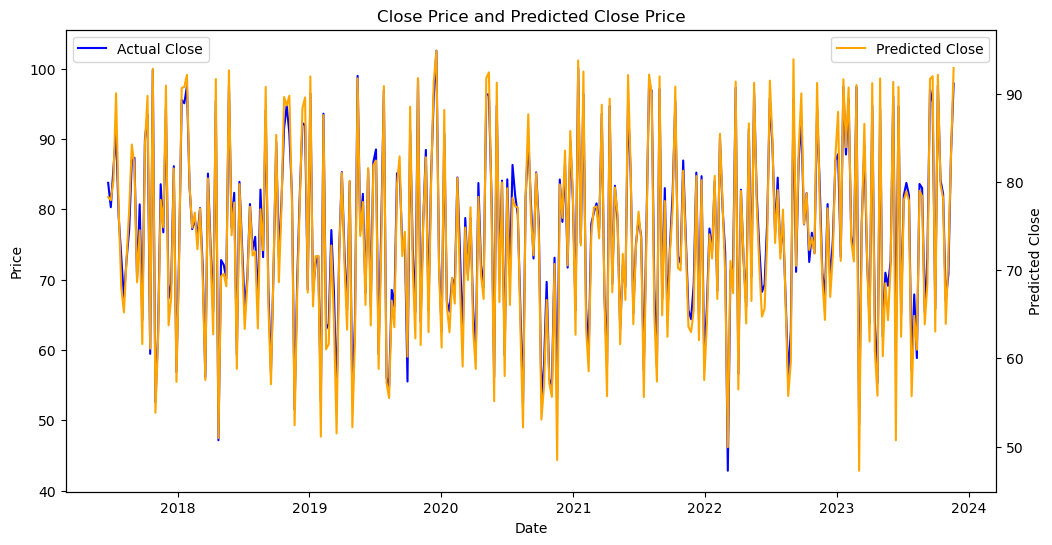

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))
date_range = pd.date_range(start=df['Date'].iloc[0], end=df['Date'].iloc[-1], periods=len(y_test))

# Stock data plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjacent Price')
ax1.plot(date_range, y_test, label='Actual Close', color='blue')
ax1.legend(loc='upper left')

# Predicted score plot
ax2 = ax1.twinx()
ax2.set_ylabel('Predicted Close')
ax2.plot(date_range, booboo, label='Predicted Close', color='orange')
ax2.legend(loc='upper right')

plt.title('Close Price and Predicted Close Price')

plt.show()